In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
from ngsim import *
from sensing import *
from measures import *

/home/lemma/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
data_folder = os.path.join('..', 'data')
ng = ngsim_data('i-80')
ng.load(os.path.join(data_folder, 'processed'))

In [6]:
TIME_MIN = list(filter(lambda x: x > 1113433300000 + 3000000, ng.snap_ordered_list))[0]
TIME_MAX = ng.snap_ordered_list[-1]
Y_MIN = 100
Y_MAX = 1600
SPATIAL_NUM = 40
TEMPORAL_NUM = 60

In [12]:
for veh_ID, v in ng.veh_dict.items():
    print (veh_ID, v)
    v.build_trajectory()

1 Vehicle: veh_ID: 1, number of unixtimes: 884
2 Vehicle: veh_ID: 2, number of unixtimes: 415
3 Vehicle: veh_ID: 3, number of unixtimes: 1153
4 Vehicle: veh_ID: 4, number of unixtimes: 1936
5 Vehicle: veh_ID: 5, number of unixtimes: 2424
6 Vehicle: veh_ID: 6, number of unixtimes: 1131
7 Vehicle: veh_ID: 7, number of unixtimes: 1122
8 Vehicle: veh_ID: 8, number of unixtimes: 1171
9 Vehicle: veh_ID: 9, number of unixtimes: 1174
10 Vehicle: veh_ID: 10, number of unixtimes: 1477
11 Vehicle: veh_ID: 11, number of unixtimes: 2000
12 Vehicle: veh_ID: 12, number of unixtimes: 1735
13 Vehicle: veh_ID: 13, number of unixtimes: 1358
15 Vehicle: veh_ID: 15, number of unixtimes: 888
17 Vehicle: veh_ID: 17, number of unixtimes: 413
19 Vehicle: veh_ID: 19, number of unixtimes: 412
21 Vehicle: veh_ID: 21, number of unixtimes: 2390
22 Vehicle: veh_ID: 22, number of unixtimes: 1528
23 Vehicle: veh_ID: 23, number of unixtimes: 1208
24 Vehicle: veh_ID: 24, number of unixtimes: 1674
25 Vehicle: veh_ID: 25,

197 Vehicle: veh_ID: 197, number of unixtimes: 762
198 Vehicle: veh_ID: 198, number of unixtimes: 1751
199 Vehicle: veh_ID: 199, number of unixtimes: 973
200 Vehicle: veh_ID: 200, number of unixtimes: 1182
201 Vehicle: veh_ID: 201, number of unixtimes: 605
202 Vehicle: veh_ID: 202, number of unixtimes: 567
203 Vehicle: veh_ID: 203, number of unixtimes: 544
204 Vehicle: veh_ID: 204, number of unixtimes: 1507
205 Vehicle: veh_ID: 205, number of unixtimes: 1167
206 Vehicle: veh_ID: 206, number of unixtimes: 411
209 Vehicle: veh_ID: 209, number of unixtimes: 936
210 Vehicle: veh_ID: 210, number of unixtimes: 1532
211 Vehicle: veh_ID: 211, number of unixtimes: 574
212 Vehicle: veh_ID: 212, number of unixtimes: 1661
213 Vehicle: veh_ID: 213, number of unixtimes: 1283
214 Vehicle: veh_ID: 214, number of unixtimes: 1032
216 Vehicle: veh_ID: 216, number of unixtimes: 694
217 Vehicle: veh_ID: 217, number of unixtimes: 614
218 Vehicle: veh_ID: 218, number of unixtimes: 374
219 Vehicle: veh_ID: 21

403 Vehicle: veh_ID: 403, number of unixtimes: 1039
405 Vehicle: veh_ID: 405, number of unixtimes: 1158
406 Vehicle: veh_ID: 406, number of unixtimes: 1853
407 Vehicle: veh_ID: 407, number of unixtimes: 1329
409 Vehicle: veh_ID: 409, number of unixtimes: 1757
410 Vehicle: veh_ID: 410, number of unixtimes: 1000
411 Vehicle: veh_ID: 411, number of unixtimes: 702
412 Vehicle: veh_ID: 412, number of unixtimes: 1334
413 Vehicle: veh_ID: 413, number of unixtimes: 1202
414 Vehicle: veh_ID: 414, number of unixtimes: 460
415 Vehicle: veh_ID: 415, number of unixtimes: 1642
416 Vehicle: veh_ID: 416, number of unixtimes: 1795
417 Vehicle: veh_ID: 417, number of unixtimes: 1847
418 Vehicle: veh_ID: 418, number of unixtimes: 1394
419 Vehicle: veh_ID: 419, number of unixtimes: 1652
420 Vehicle: veh_ID: 420, number of unixtimes: 1589
421 Vehicle: veh_ID: 421, number of unixtimes: 1529
422 Vehicle: veh_ID: 422, number of unixtimes: 800
423 Vehicle: veh_ID: 423, number of unixtimes: 1426
424 Vehicle: ve

612 Vehicle: veh_ID: 612, number of unixtimes: 1509
613 Vehicle: veh_ID: 613, number of unixtimes: 1964
614 Vehicle: veh_ID: 614, number of unixtimes: 1872
615 Vehicle: veh_ID: 615, number of unixtimes: 1060
616 Vehicle: veh_ID: 616, number of unixtimes: 1072
617 Vehicle: veh_ID: 617, number of unixtimes: 1321
618 Vehicle: veh_ID: 618, number of unixtimes: 737
619 Vehicle: veh_ID: 619, number of unixtimes: 1622
620 Vehicle: veh_ID: 620, number of unixtimes: 1668
621 Vehicle: veh_ID: 621, number of unixtimes: 2164
622 Vehicle: veh_ID: 622, number of unixtimes: 2090
623 Vehicle: veh_ID: 623, number of unixtimes: 821
624 Vehicle: veh_ID: 624, number of unixtimes: 339
625 Vehicle: veh_ID: 625, number of unixtimes: 1208
626 Vehicle: veh_ID: 626, number of unixtimes: 721
627 Vehicle: veh_ID: 627, number of unixtimes: 708
628 Vehicle: veh_ID: 628, number of unixtimes: 1341
629 Vehicle: veh_ID: 629, number of unixtimes: 1647
630 Vehicle: veh_ID: 630, number of unixtimes: 1506
631 Vehicle: veh_

779 Vehicle: veh_ID: 779, number of unixtimes: 1363
780 Vehicle: veh_ID: 780, number of unixtimes: 539
781 Vehicle: veh_ID: 781, number of unixtimes: 867
782 Vehicle: veh_ID: 782, number of unixtimes: 2396
783 Vehicle: veh_ID: 783, number of unixtimes: 955
784 Vehicle: veh_ID: 784, number of unixtimes: 1352
785 Vehicle: veh_ID: 785, number of unixtimes: 1605
786 Vehicle: veh_ID: 786, number of unixtimes: 723
787 Vehicle: veh_ID: 787, number of unixtimes: 2208
788 Vehicle: veh_ID: 788, number of unixtimes: 1249
789 Vehicle: veh_ID: 789, number of unixtimes: 887
790 Vehicle: veh_ID: 790, number of unixtimes: 1705
791 Vehicle: veh_ID: 791, number of unixtimes: 1820
792 Vehicle: veh_ID: 792, number of unixtimes: 553
793 Vehicle: veh_ID: 793, number of unixtimes: 1471
794 Vehicle: veh_ID: 794, number of unixtimes: 719
795 Vehicle: veh_ID: 795, number of unixtimes: 1245
796 Vehicle: veh_ID: 796, number of unixtimes: 522
797 Vehicle: veh_ID: 797, number of unixtimes: 1996
798 Vehicle: veh_ID:

940 Vehicle: veh_ID: 940, number of unixtimes: 922
941 Vehicle: veh_ID: 941, number of unixtimes: 638
942 Vehicle: veh_ID: 942, number of unixtimes: 707
943 Vehicle: veh_ID: 943, number of unixtimes: 1268
944 Vehicle: veh_ID: 944, number of unixtimes: 1682
945 Vehicle: veh_ID: 945, number of unixtimes: 1795
946 Vehicle: veh_ID: 946, number of unixtimes: 1480
947 Vehicle: veh_ID: 947, number of unixtimes: 1676
948 Vehicle: veh_ID: 948, number of unixtimes: 1224
949 Vehicle: veh_ID: 949, number of unixtimes: 687
950 Vehicle: veh_ID: 950, number of unixtimes: 587
951 Vehicle: veh_ID: 951, number of unixtimes: 1091
952 Vehicle: veh_ID: 952, number of unixtimes: 1699
953 Vehicle: veh_ID: 953, number of unixtimes: 1671
954 Vehicle: veh_ID: 954, number of unixtimes: 916
955 Vehicle: veh_ID: 955, number of unixtimes: 1040
956 Vehicle: veh_ID: 956, number of unixtimes: 1646
957 Vehicle: veh_ID: 957, number of unixtimes: 1290
958 Vehicle: veh_ID: 958, number of unixtimes: 998
959 Vehicle: veh_ID

1130 Vehicle: veh_ID: 1130, number of unixtimes: 2186
1131 Vehicle: veh_ID: 1131, number of unixtimes: 1588
1132 Vehicle: veh_ID: 1132, number of unixtimes: 1560
1133 Vehicle: veh_ID: 1133, number of unixtimes: 1731
1134 Vehicle: veh_ID: 1134, number of unixtimes: 1882
1135 Vehicle: veh_ID: 1135, number of unixtimes: 1720
1136 Vehicle: veh_ID: 1136, number of unixtimes: 2084
1137 Vehicle: veh_ID: 1137, number of unixtimes: 713
1138 Vehicle: veh_ID: 1138, number of unixtimes: 1513
1139 Vehicle: veh_ID: 1139, number of unixtimes: 1502
1140 Vehicle: veh_ID: 1140, number of unixtimes: 1749
1141 Vehicle: veh_ID: 1141, number of unixtimes: 829
1142 Vehicle: veh_ID: 1142, number of unixtimes: 330
1143 Vehicle: veh_ID: 1143, number of unixtimes: 1222
1145 Vehicle: veh_ID: 1145, number of unixtimes: 1058
1146 Vehicle: veh_ID: 1146, number of unixtimes: 1464
1147 Vehicle: veh_ID: 1147, number of unixtimes: 2001
1148 Vehicle: veh_ID: 1148, number of unixtimes: 1814
1149 Vehicle: veh_ID: 1149, num

1317 Vehicle: veh_ID: 1317, number of unixtimes: 2259
1318 Vehicle: veh_ID: 1318, number of unixtimes: 1798
1319 Vehicle: veh_ID: 1319, number of unixtimes: 1522
1320 Vehicle: veh_ID: 1320, number of unixtimes: 1517
1321 Vehicle: veh_ID: 1321, number of unixtimes: 1529
1322 Vehicle: veh_ID: 1322, number of unixtimes: 1933
1323 Vehicle: veh_ID: 1323, number of unixtimes: 1548
1324 Vehicle: veh_ID: 1324, number of unixtimes: 1568
1325 Vehicle: veh_ID: 1325, number of unixtimes: 1288
1326 Vehicle: veh_ID: 1326, number of unixtimes: 979
1327 Vehicle: veh_ID: 1327, number of unixtimes: 324
1328 Vehicle: veh_ID: 1328, number of unixtimes: 1439
1329 Vehicle: veh_ID: 1329, number of unixtimes: 1599
1330 Vehicle: veh_ID: 1330, number of unixtimes: 1939
1331 Vehicle: veh_ID: 1331, number of unixtimes: 2010
1332 Vehicle: veh_ID: 1332, number of unixtimes: 1969
1333 Vehicle: veh_ID: 1333, number of unixtimes: 2513
1334 Vehicle: veh_ID: 1334, number of unixtimes: 1444
1335 Vehicle: veh_ID: 1335, nu

1474 Vehicle: veh_ID: 1474, number of unixtimes: 1661
1475 Vehicle: veh_ID: 1475, number of unixtimes: 1239
1476 Vehicle: veh_ID: 1476, number of unixtimes: 2753
1477 Vehicle: veh_ID: 1477, number of unixtimes: 3009
1478 Vehicle: veh_ID: 1478, number of unixtimes: 2670
1479 Vehicle: veh_ID: 1479, number of unixtimes: 2943
1480 Vehicle: veh_ID: 1480, number of unixtimes: 2066
1481 Vehicle: veh_ID: 1481, number of unixtimes: 2876
1482 Vehicle: veh_ID: 1482, number of unixtimes: 3417
1483 Vehicle: veh_ID: 1483, number of unixtimes: 1675
1484 Vehicle: veh_ID: 1484, number of unixtimes: 1547
1485 Vehicle: veh_ID: 1485, number of unixtimes: 3058
1486 Vehicle: veh_ID: 1486, number of unixtimes: 3188
1487 Vehicle: veh_ID: 1487, number of unixtimes: 2760
1488 Vehicle: veh_ID: 1488, number of unixtimes: 2118
1489 Vehicle: veh_ID: 1489, number of unixtimes: 1801
1490 Vehicle: veh_ID: 1490, number of unixtimes: 1765
1491 Vehicle: veh_ID: 1491, number of unixtimes: 3094
1492 Vehicle: veh_ID: 1492, 

1649 Vehicle: veh_ID: 1649, number of unixtimes: 681
1650 Vehicle: veh_ID: 1650, number of unixtimes: 1123
1651 Vehicle: veh_ID: 1651, number of unixtimes: 3132
1652 Vehicle: veh_ID: 1652, number of unixtimes: 224
1653 Vehicle: veh_ID: 1653, number of unixtimes: 2059
1654 Vehicle: veh_ID: 1654, number of unixtimes: 2954
1655 Vehicle: veh_ID: 1655, number of unixtimes: 2494
1656 Vehicle: veh_ID: 1656, number of unixtimes: 2340
1657 Vehicle: veh_ID: 1657, number of unixtimes: 2841
1658 Vehicle: veh_ID: 1658, number of unixtimes: 1079
1659 Vehicle: veh_ID: 1659, number of unixtimes: 1489
1660 Vehicle: veh_ID: 1660, number of unixtimes: 1415
1661 Vehicle: veh_ID: 1661, number of unixtimes: 1498
1662 Vehicle: veh_ID: 1662, number of unixtimes: 2025
1663 Vehicle: veh_ID: 1663, number of unixtimes: 1170
1664 Vehicle: veh_ID: 1664, number of unixtimes: 1469
1665 Vehicle: veh_ID: 1665, number of unixtimes: 2395
1666 Vehicle: veh_ID: 1666, number of unixtimes: 2469
1667 Vehicle: veh_ID: 1667, nu

1813 Vehicle: veh_ID: 1813, number of unixtimes: 3644
1814 Vehicle: veh_ID: 1814, number of unixtimes: 2885
1815 Vehicle: veh_ID: 1815, number of unixtimes: 1745
1816 Vehicle: veh_ID: 1816, number of unixtimes: 1834
1817 Vehicle: veh_ID: 1817, number of unixtimes: 1604
1818 Vehicle: veh_ID: 1818, number of unixtimes: 2725
1819 Vehicle: veh_ID: 1819, number of unixtimes: 2498
1821 Vehicle: veh_ID: 1821, number of unixtimes: 3220
1822 Vehicle: veh_ID: 1822, number of unixtimes: 1612
1823 Vehicle: veh_ID: 1823, number of unixtimes: 572
1824 Vehicle: veh_ID: 1824, number of unixtimes: 3112
1825 Vehicle: veh_ID: 1825, number of unixtimes: 2855
1826 Vehicle: veh_ID: 1826, number of unixtimes: 1151
1827 Vehicle: veh_ID: 1827, number of unixtimes: 1751
1828 Vehicle: veh_ID: 1828, number of unixtimes: 2870
1829 Vehicle: veh_ID: 1829, number of unixtimes: 817
1830 Vehicle: veh_ID: 1830, number of unixtimes: 1052
1831 Vehicle: veh_ID: 1831, number of unixtimes: 2711
1832 Vehicle: veh_ID: 1832, nu

1988 Vehicle: veh_ID: 1988, number of unixtimes: 1379
1989 Vehicle: veh_ID: 1989, number of unixtimes: 2214
1990 Vehicle: veh_ID: 1990, number of unixtimes: 1396
1991 Vehicle: veh_ID: 1991, number of unixtimes: 2033
1992 Vehicle: veh_ID: 1992, number of unixtimes: 2533
1993 Vehicle: veh_ID: 1993, number of unixtimes: 2144
1994 Vehicle: veh_ID: 1994, number of unixtimes: 2848
1995 Vehicle: veh_ID: 1995, number of unixtimes: 2531
1996 Vehicle: veh_ID: 1996, number of unixtimes: 1439
1997 Vehicle: veh_ID: 1997, number of unixtimes: 4381
1998 Vehicle: veh_ID: 1998, number of unixtimes: 2276
1999 Vehicle: veh_ID: 1999, number of unixtimes: 2255
2000 Vehicle: veh_ID: 2000, number of unixtimes: 655
2001 Vehicle: veh_ID: 2001, number of unixtimes: 2452
2002 Vehicle: veh_ID: 2002, number of unixtimes: 2025
2003 Vehicle: veh_ID: 2003, number of unixtimes: 703
2004 Vehicle: veh_ID: 2004, number of unixtimes: 3397
2005 Vehicle: veh_ID: 2005, number of unixtimes: 1788
2006 Vehicle: veh_ID: 2006, nu

2157 Vehicle: veh_ID: 2157, number of unixtimes: 350
2158 Vehicle: veh_ID: 2158, number of unixtimes: 4320
2159 Vehicle: veh_ID: 2159, number of unixtimes: 4575
2160 Vehicle: veh_ID: 2160, number of unixtimes: 1745
2161 Vehicle: veh_ID: 2161, number of unixtimes: 866
2162 Vehicle: veh_ID: 2162, number of unixtimes: 2207
2163 Vehicle: veh_ID: 2163, number of unixtimes: 773
2164 Vehicle: veh_ID: 2164, number of unixtimes: 1679
2165 Vehicle: veh_ID: 2165, number of unixtimes: 3171
2166 Vehicle: veh_ID: 2166, number of unixtimes: 1345
2167 Vehicle: veh_ID: 2167, number of unixtimes: 837
2168 Vehicle: veh_ID: 2168, number of unixtimes: 2429
2169 Vehicle: veh_ID: 2169, number of unixtimes: 2181
2170 Vehicle: veh_ID: 2170, number of unixtimes: 3538
2171 Vehicle: veh_ID: 2171, number of unixtimes: 1108
2172 Vehicle: veh_ID: 2172, number of unixtimes: 1682
2173 Vehicle: veh_ID: 2173, number of unixtimes: 1935
2174 Vehicle: veh_ID: 2174, number of unixtimes: 2213
2175 Vehicle: veh_ID: 2175, numb

2356 Vehicle: veh_ID: 2356, number of unixtimes: 2541
2357 Vehicle: veh_ID: 2357, number of unixtimes: 680
2358 Vehicle: veh_ID: 2358, number of unixtimes: 2547
2359 Vehicle: veh_ID: 2359, number of unixtimes: 1425
2360 Vehicle: veh_ID: 2360, number of unixtimes: 3987
2361 Vehicle: veh_ID: 2361, number of unixtimes: 2182
2362 Vehicle: veh_ID: 2362, number of unixtimes: 2257
2363 Vehicle: veh_ID: 2363, number of unixtimes: 683
2364 Vehicle: veh_ID: 2364, number of unixtimes: 2162
2365 Vehicle: veh_ID: 2365, number of unixtimes: 2074
2366 Vehicle: veh_ID: 2366, number of unixtimes: 3579
2367 Vehicle: veh_ID: 2367, number of unixtimes: 637
2368 Vehicle: veh_ID: 2368, number of unixtimes: 2284
2369 Vehicle: veh_ID: 2369, number of unixtimes: 2742
2370 Vehicle: veh_ID: 2370, number of unixtimes: 2898
2371 Vehicle: veh_ID: 2371, number of unixtimes: 2119
2372 Vehicle: veh_ID: 2372, number of unixtimes: 2385
2373 Vehicle: veh_ID: 2373, number of unixtimes: 295
2374 Vehicle: veh_ID: 2374, numb

2522 Vehicle: veh_ID: 2522, number of unixtimes: 407
2525 Vehicle: veh_ID: 2525, number of unixtimes: 1019
2527 Vehicle: veh_ID: 2527, number of unixtimes: 408
2528 Vehicle: veh_ID: 2528, number of unixtimes: 2148
2531 Vehicle: veh_ID: 2531, number of unixtimes: 1441
2532 Vehicle: veh_ID: 2532, number of unixtimes: 1023
2534 Vehicle: veh_ID: 2534, number of unixtimes: 401
2536 Vehicle: veh_ID: 2536, number of unixtimes: 1993
2537 Vehicle: veh_ID: 2537, number of unixtimes: 1428
2538 Vehicle: veh_ID: 2538, number of unixtimes: 1576
2539 Vehicle: veh_ID: 2539, number of unixtimes: 1448
2541 Vehicle: veh_ID: 2541, number of unixtimes: 402
2542 Vehicle: veh_ID: 2542, number of unixtimes: 1834
2543 Vehicle: veh_ID: 2543, number of unixtimes: 1022
2544 Vehicle: veh_ID: 2544, number of unixtimes: 2101
2546 Vehicle: veh_ID: 2546, number of unixtimes: 1551
2547 Vehicle: veh_ID: 2547, number of unixtimes: 1301
2548 Vehicle: veh_ID: 2548, number of unixtimes: 401
2550 Vehicle: veh_ID: 2550, numbe

2813 Vehicle: veh_ID: 2813, number of unixtimes: 1363
2814 Vehicle: veh_ID: 2814, number of unixtimes: 751
2815 Vehicle: veh_ID: 2815, number of unixtimes: 312
2816 Vehicle: veh_ID: 2816, number of unixtimes: 2474
2817 Vehicle: veh_ID: 2817, number of unixtimes: 2118
2818 Vehicle: veh_ID: 2818, number of unixtimes: 1370
2819 Vehicle: veh_ID: 2819, number of unixtimes: 1187
2820 Vehicle: veh_ID: 2820, number of unixtimes: 822
2821 Vehicle: veh_ID: 2821, number of unixtimes: 319
2822 Vehicle: veh_ID: 2822, number of unixtimes: 2010
2823 Vehicle: veh_ID: 2823, number of unixtimes: 1743
2824 Vehicle: veh_ID: 2824, number of unixtimes: 1995
2825 Vehicle: veh_ID: 2825, number of unixtimes: 1982
2826 Vehicle: veh_ID: 2826, number of unixtimes: 663
2827 Vehicle: veh_ID: 2827, number of unixtimes: 430
2828 Vehicle: veh_ID: 2828, number of unixtimes: 2087
2829 Vehicle: veh_ID: 2829, number of unixtimes: 1669
2830 Vehicle: veh_ID: 2830, number of unixtimes: 2010
2831 Vehicle: veh_ID: 2831, number

3041 Vehicle: veh_ID: 3041, number of unixtimes: 966
3044 Vehicle: veh_ID: 3044, number of unixtimes: 708
3046 Vehicle: veh_ID: 3046, number of unixtimes: 658
3049 Vehicle: veh_ID: 3049, number of unixtimes: 380
3050 Vehicle: veh_ID: 3050, number of unixtimes: 382
3051 Vehicle: veh_ID: 3051, number of unixtimes: 1143
3053 Vehicle: veh_ID: 3053, number of unixtimes: 1085
3054 Vehicle: veh_ID: 3054, number of unixtimes: 693
3055 Vehicle: veh_ID: 3055, number of unixtimes: 936
3057 Vehicle: veh_ID: 3057, number of unixtimes: 394
3059 Vehicle: veh_ID: 3059, number of unixtimes: 726
3060 Vehicle: veh_ID: 3060, number of unixtimes: 602
3061 Vehicle: veh_ID: 3061, number of unixtimes: 1076
3063 Vehicle: veh_ID: 3063, number of unixtimes: 703
3064 Vehicle: veh_ID: 3064, number of unixtimes: 942
3065 Vehicle: veh_ID: 3065, number of unixtimes: 627
3066 Vehicle: veh_ID: 3066, number of unixtimes: 382
3067 Vehicle: veh_ID: 3067, number of unixtimes: 1033
3071 Vehicle: veh_ID: 3071, number of unix

3293 Vehicle: veh_ID: 3293, number of unixtimes: 614
3294 Vehicle: veh_ID: 3294, number of unixtimes: 336
3295 Vehicle: veh_ID: 3295, number of unixtimes: 712
3296 Vehicle: veh_ID: 3296, number of unixtimes: 736
3297 Vehicle: veh_ID: 3297, number of unixtimes: 550
3299 Vehicle: veh_ID: 3299, number of unixtimes: 599
3300 Vehicle: veh_ID: 3300, number of unixtimes: 337
3301 Vehicle: veh_ID: 3301, number of unixtimes: 568
3302 Vehicle: veh_ID: 3302, number of unixtimes: 702
3304 Vehicle: veh_ID: 3304, number of unixtimes: 601
3305 Vehicle: veh_ID: 3305, number of unixtimes: 605
3306 Vehicle: veh_ID: 3306, number of unixtimes: 561
3307 Vehicle: veh_ID: 3307, number of unixtimes: 698
3308 Vehicle: veh_ID: 3308, number of unixtimes: 847
3309 Vehicle: veh_ID: 3309, number of unixtimes: 851
3312 Vehicle: veh_ID: 3312, number of unixtimes: 316
3313 Vehicle: veh_ID: 3313, number of unixtimes: 606
3314 Vehicle: veh_ID: 3314, number of unixtimes: 616
3315 Vehicle: veh_ID: 3315, number of unixtime

In [13]:
m = mesh(num_spatial_cells = SPATIAL_NUM, num_temporal_cells = TEMPORAL_NUM, num_lane = 6)
m.init_mesh(Y_MIN, Y_MAX, TIME_MIN, TIME_MAX)
for veh_ID, v in ng.veh_dict.items():
    print (veh_ID, v)
    m.update_vehilce(v)
m.update_qkv()

1 Vehicle: veh_ID: 1, number of unixtimes: 884
2 Vehicle: veh_ID: 2, number of unixtimes: 415
3 Vehicle: veh_ID: 3, number of unixtimes: 1153
4 Vehicle: veh_ID: 4, number of unixtimes: 1936
5 Vehicle: veh_ID: 5, number of unixtimes: 2424
6 Vehicle: veh_ID: 6, number of unixtimes: 1131
7 Vehicle: veh_ID: 7, number of unixtimes: 1122
8 Vehicle: veh_ID: 8, number of unixtimes: 1171
9 Vehicle: veh_ID: 9, number of unixtimes: 1174
10 Vehicle: veh_ID: 10, number of unixtimes: 1477
11 Vehicle: veh_ID: 11, number of unixtimes: 2000
12 Vehicle: veh_ID: 12, number of unixtimes: 1735
13 Vehicle: veh_ID: 13, number of unixtimes: 1358
15 Vehicle: veh_ID: 15, number of unixtimes: 888
17 Vehicle: veh_ID: 17, number of unixtimes: 413
19 Vehicle: veh_ID: 19, number of unixtimes: 412
21 Vehicle: veh_ID: 21, number of unixtimes: 2390
22 Vehicle: veh_ID: 22, number of unixtimes: 1528
23 Vehicle: veh_ID: 23, number of unixtimes: 1208
24 Vehicle: veh_ID: 24, number of unixtimes: 1674
25 Vehicle: veh_ID: 25,

193 Vehicle: veh_ID: 193, number of unixtimes: 1625
194 Vehicle: veh_ID: 194, number of unixtimes: 1283
195 Vehicle: veh_ID: 195, number of unixtimes: 1109
197 Vehicle: veh_ID: 197, number of unixtimes: 762
198 Vehicle: veh_ID: 198, number of unixtimes: 1751
199 Vehicle: veh_ID: 199, number of unixtimes: 973
200 Vehicle: veh_ID: 200, number of unixtimes: 1182
201 Vehicle: veh_ID: 201, number of unixtimes: 605
202 Vehicle: veh_ID: 202, number of unixtimes: 567
203 Vehicle: veh_ID: 203, number of unixtimes: 544
204 Vehicle: veh_ID: 204, number of unixtimes: 1507
205 Vehicle: veh_ID: 205, number of unixtimes: 1167
206 Vehicle: veh_ID: 206, number of unixtimes: 411
209 Vehicle: veh_ID: 209, number of unixtimes: 936
210 Vehicle: veh_ID: 210, number of unixtimes: 1532
211 Vehicle: veh_ID: 211, number of unixtimes: 574
212 Vehicle: veh_ID: 212, number of unixtimes: 1661
213 Vehicle: veh_ID: 213, number of unixtimes: 1283
214 Vehicle: veh_ID: 214, number of unixtimes: 1032
216 Vehicle: veh_ID:

366 Vehicle: veh_ID: 366, number of unixtimes: 1032
367 Vehicle: veh_ID: 367, number of unixtimes: 729
368 Vehicle: veh_ID: 368, number of unixtimes: 1713
369 Vehicle: veh_ID: 369, number of unixtimes: 503
370 Vehicle: veh_ID: 370, number of unixtimes: 1240
371 Vehicle: veh_ID: 371, number of unixtimes: 994
372 Vehicle: veh_ID: 372, number of unixtimes: 1400
373 Vehicle: veh_ID: 373, number of unixtimes: 1468
374 Vehicle: veh_ID: 374, number of unixtimes: 612
375 Vehicle: veh_ID: 375, number of unixtimes: 1892
376 Vehicle: veh_ID: 376, number of unixtimes: 1529
377 Vehicle: veh_ID: 377, number of unixtimes: 1118
378 Vehicle: veh_ID: 378, number of unixtimes: 1509
379 Vehicle: veh_ID: 379, number of unixtimes: 534
380 Vehicle: veh_ID: 380, number of unixtimes: 1008
381 Vehicle: veh_ID: 381, number of unixtimes: 1292
382 Vehicle: veh_ID: 382, number of unixtimes: 1324
383 Vehicle: veh_ID: 383, number of unixtimes: 1537
384 Vehicle: veh_ID: 384, number of unixtimes: 982
385 Vehicle: veh_I

532 Vehicle: veh_ID: 532, number of unixtimes: 379
533 Vehicle: veh_ID: 533, number of unixtimes: 1280
534 Vehicle: veh_ID: 534, number of unixtimes: 1469
535 Vehicle: veh_ID: 535, number of unixtimes: 1549
536 Vehicle: veh_ID: 536, number of unixtimes: 2056
537 Vehicle: veh_ID: 537, number of unixtimes: 2043
538 Vehicle: veh_ID: 538, number of unixtimes: 2204
539 Vehicle: veh_ID: 539, number of unixtimes: 1622
540 Vehicle: veh_ID: 540, number of unixtimes: 444
541 Vehicle: veh_ID: 541, number of unixtimes: 654
542 Vehicle: veh_ID: 542, number of unixtimes: 1766
544 Vehicle: veh_ID: 544, number of unixtimes: 1229
545 Vehicle: veh_ID: 545, number of unixtimes: 2043
546 Vehicle: veh_ID: 546, number of unixtimes: 1311
547 Vehicle: veh_ID: 547, number of unixtimes: 1738
548 Vehicle: veh_ID: 548, number of unixtimes: 541
549 Vehicle: veh_ID: 549, number of unixtimes: 994
550 Vehicle: veh_ID: 550, number of unixtimes: 1398
552 Vehicle: veh_ID: 552, number of unixtimes: 1719
553 Vehicle: veh_

699 Vehicle: veh_ID: 699, number of unixtimes: 2339
700 Vehicle: veh_ID: 700, number of unixtimes: 1202
701 Vehicle: veh_ID: 701, number of unixtimes: 662
702 Vehicle: veh_ID: 702, number of unixtimes: 2288
703 Vehicle: veh_ID: 703, number of unixtimes: 1553
704 Vehicle: veh_ID: 704, number of unixtimes: 473
705 Vehicle: veh_ID: 705, number of unixtimes: 1653
706 Vehicle: veh_ID: 706, number of unixtimes: 2343
707 Vehicle: veh_ID: 707, number of unixtimes: 1493
708 Vehicle: veh_ID: 708, number of unixtimes: 1746
709 Vehicle: veh_ID: 709, number of unixtimes: 1325
710 Vehicle: veh_ID: 710, number of unixtimes: 1238
711 Vehicle: veh_ID: 711, number of unixtimes: 1596
712 Vehicle: veh_ID: 712, number of unixtimes: 1050
713 Vehicle: veh_ID: 713, number of unixtimes: 2166
714 Vehicle: veh_ID: 714, number of unixtimes: 2254
715 Vehicle: veh_ID: 715, number of unixtimes: 1756
716 Vehicle: veh_ID: 716, number of unixtimes: 1258
717 Vehicle: veh_ID: 717, number of unixtimes: 843
718 Vehicle: ve

859 Vehicle: veh_ID: 859, number of unixtimes: 1342
860 Vehicle: veh_ID: 860, number of unixtimes: 2140
861 Vehicle: veh_ID: 861, number of unixtimes: 1529
862 Vehicle: veh_ID: 862, number of unixtimes: 1947
863 Vehicle: veh_ID: 863, number of unixtimes: 834
864 Vehicle: veh_ID: 864, number of unixtimes: 653
865 Vehicle: veh_ID: 865, number of unixtimes: 1570
866 Vehicle: veh_ID: 866, number of unixtimes: 1486
867 Vehicle: veh_ID: 867, number of unixtimes: 754
868 Vehicle: veh_ID: 868, number of unixtimes: 1635
869 Vehicle: veh_ID: 869, number of unixtimes: 1578
870 Vehicle: veh_ID: 870, number of unixtimes: 2255
871 Vehicle: veh_ID: 871, number of unixtimes: 1633
872 Vehicle: veh_ID: 872, number of unixtimes: 471
873 Vehicle: veh_ID: 873, number of unixtimes: 897
874 Vehicle: veh_ID: 874, number of unixtimes: 1650
875 Vehicle: veh_ID: 875, number of unixtimes: 2033
876 Vehicle: veh_ID: 876, number of unixtimes: 2443
877 Vehicle: veh_ID: 877, number of unixtimes: 1276
878 Vehicle: veh_

1018 Vehicle: veh_ID: 1018, number of unixtimes: 712
1019 Vehicle: veh_ID: 1019, number of unixtimes: 980
1020 Vehicle: veh_ID: 1020, number of unixtimes: 1006
1021 Vehicle: veh_ID: 1021, number of unixtimes: 632
1022 Vehicle: veh_ID: 1022, number of unixtimes: 873
1023 Vehicle: veh_ID: 1023, number of unixtimes: 2470
1024 Vehicle: veh_ID: 1024, number of unixtimes: 2022
1025 Vehicle: veh_ID: 1025, number of unixtimes: 2235
1026 Vehicle: veh_ID: 1026, number of unixtimes: 1911
1027 Vehicle: veh_ID: 1027, number of unixtimes: 727
1028 Vehicle: veh_ID: 1028, number of unixtimes: 1034
1029 Vehicle: veh_ID: 1029, number of unixtimes: 1979
1030 Vehicle: veh_ID: 1030, number of unixtimes: 1652
1031 Vehicle: veh_ID: 1031, number of unixtimes: 1925
1032 Vehicle: veh_ID: 1032, number of unixtimes: 1236
1033 Vehicle: veh_ID: 1033, number of unixtimes: 1008
1034 Vehicle: veh_ID: 1034, number of unixtimes: 1495
1035 Vehicle: veh_ID: 1035, number of unixtimes: 1253
1036 Vehicle: veh_ID: 1036, numbe

1172 Vehicle: veh_ID: 1172, number of unixtimes: 1463
1173 Vehicle: veh_ID: 1173, number of unixtimes: 2081
1174 Vehicle: veh_ID: 1174, number of unixtimes: 1694
1175 Vehicle: veh_ID: 1175, number of unixtimes: 1937
1176 Vehicle: veh_ID: 1176, number of unixtimes: 540
1177 Vehicle: veh_ID: 1177, number of unixtimes: 749
1178 Vehicle: veh_ID: 1178, number of unixtimes: 1917
1179 Vehicle: veh_ID: 1179, number of unixtimes: 1700
1180 Vehicle: veh_ID: 1180, number of unixtimes: 1476
1181 Vehicle: veh_ID: 1181, number of unixtimes: 2028
1182 Vehicle: veh_ID: 1182, number of unixtimes: 1858
1183 Vehicle: veh_ID: 1183, number of unixtimes: 1210
1184 Vehicle: veh_ID: 1184, number of unixtimes: 1294
1185 Vehicle: veh_ID: 1185, number of unixtimes: 902
1188 Vehicle: veh_ID: 1188, number of unixtimes: 1134
1189 Vehicle: veh_ID: 1189, number of unixtimes: 1165
1190 Vehicle: veh_ID: 1190, number of unixtimes: 1312
1191 Vehicle: veh_ID: 1191, number of unixtimes: 2191
1192 Vehicle: veh_ID: 1192, num

1328 Vehicle: veh_ID: 1328, number of unixtimes: 1439
1329 Vehicle: veh_ID: 1329, number of unixtimes: 1599
1330 Vehicle: veh_ID: 1330, number of unixtimes: 1939
1331 Vehicle: veh_ID: 1331, number of unixtimes: 2010
1332 Vehicle: veh_ID: 1332, number of unixtimes: 1969
1333 Vehicle: veh_ID: 1333, number of unixtimes: 2513
1334 Vehicle: veh_ID: 1334, number of unixtimes: 1444
1335 Vehicle: veh_ID: 1335, number of unixtimes: 634
1336 Vehicle: veh_ID: 1336, number of unixtimes: 763
1337 Vehicle: veh_ID: 1337, number of unixtimes: 2195
1338 Vehicle: veh_ID: 1338, number of unixtimes: 2187
1339 Vehicle: veh_ID: 1339, number of unixtimes: 1131
1340 Vehicle: veh_ID: 1340, number of unixtimes: 1453
1341 Vehicle: veh_ID: 1341, number of unixtimes: 2701
1342 Vehicle: veh_ID: 1342, number of unixtimes: 1527
1343 Vehicle: veh_ID: 1343, number of unixtimes: 2239
1344 Vehicle: veh_ID: 1344, number of unixtimes: 1800
1345 Vehicle: veh_ID: 1345, number of unixtimes: 1829
1346 Vehicle: veh_ID: 1346, nu

1480 Vehicle: veh_ID: 1480, number of unixtimes: 2066
1481 Vehicle: veh_ID: 1481, number of unixtimes: 2876
1482 Vehicle: veh_ID: 1482, number of unixtimes: 3417
1483 Vehicle: veh_ID: 1483, number of unixtimes: 1675
1484 Vehicle: veh_ID: 1484, number of unixtimes: 1547
1485 Vehicle: veh_ID: 1485, number of unixtimes: 3058
1486 Vehicle: veh_ID: 1486, number of unixtimes: 3188
1487 Vehicle: veh_ID: 1487, number of unixtimes: 2760
1488 Vehicle: veh_ID: 1488, number of unixtimes: 2118
1489 Vehicle: veh_ID: 1489, number of unixtimes: 1801
1490 Vehicle: veh_ID: 1490, number of unixtimes: 1765
1491 Vehicle: veh_ID: 1491, number of unixtimes: 3094
1492 Vehicle: veh_ID: 1492, number of unixtimes: 1683
1493 Vehicle: veh_ID: 1493, number of unixtimes: 250
1494 Vehicle: veh_ID: 1494, number of unixtimes: 1540
1495 Vehicle: veh_ID: 1495, number of unixtimes: 1433
1496 Vehicle: veh_ID: 1496, number of unixtimes: 1711
1497 Vehicle: veh_ID: 1497, number of unixtimes: 1555
1498 Vehicle: veh_ID: 1498, n

1633 Vehicle: veh_ID: 1633, number of unixtimes: 3311
1634 Vehicle: veh_ID: 1634, number of unixtimes: 1770
1635 Vehicle: veh_ID: 1635, number of unixtimes: 1697
1636 Vehicle: veh_ID: 1636, number of unixtimes: 669
1637 Vehicle: veh_ID: 1637, number of unixtimes: 452
1638 Vehicle: veh_ID: 1638, number of unixtimes: 670
1639 Vehicle: veh_ID: 1639, number of unixtimes: 2106
1640 Vehicle: veh_ID: 1640, number of unixtimes: 512
1641 Vehicle: veh_ID: 1641, number of unixtimes: 1134
1642 Vehicle: veh_ID: 1642, number of unixtimes: 3105
1643 Vehicle: veh_ID: 1643, number of unixtimes: 2128
1644 Vehicle: veh_ID: 1644, number of unixtimes: 1560
1645 Vehicle: veh_ID: 1645, number of unixtimes: 1581
1646 Vehicle: veh_ID: 1646, number of unixtimes: 1164
1647 Vehicle: veh_ID: 1647, number of unixtimes: 2816
1648 Vehicle: veh_ID: 1648, number of unixtimes: 2346
1649 Vehicle: veh_ID: 1649, number of unixtimes: 681
1650 Vehicle: veh_ID: 1650, number of unixtimes: 1123
1651 Vehicle: veh_ID: 1651, numbe

1788 Vehicle: veh_ID: 1788, number of unixtimes: 3447
1789 Vehicle: veh_ID: 1789, number of unixtimes: 1134
1790 Vehicle: veh_ID: 1790, number of unixtimes: 1602
1791 Vehicle: veh_ID: 1791, number of unixtimes: 358
1792 Vehicle: veh_ID: 1792, number of unixtimes: 1649
1793 Vehicle: veh_ID: 1793, number of unixtimes: 2743
1794 Vehicle: veh_ID: 1794, number of unixtimes: 1442
1795 Vehicle: veh_ID: 1795, number of unixtimes: 3402
1796 Vehicle: veh_ID: 1796, number of unixtimes: 2834
1797 Vehicle: veh_ID: 1797, number of unixtimes: 1234
1798 Vehicle: veh_ID: 1798, number of unixtimes: 2586
1799 Vehicle: veh_ID: 1799, number of unixtimes: 3014
1800 Vehicle: veh_ID: 1800, number of unixtimes: 3293
1801 Vehicle: veh_ID: 1801, number of unixtimes: 3859
1802 Vehicle: veh_ID: 1802, number of unixtimes: 1284
1803 Vehicle: veh_ID: 1803, number of unixtimes: 2286
1804 Vehicle: veh_ID: 1804, number of unixtimes: 1932
1805 Vehicle: veh_ID: 1805, number of unixtimes: 2944
1806 Vehicle: veh_ID: 1806, n

1947 Vehicle: veh_ID: 1947, number of unixtimes: 873
1948 Vehicle: veh_ID: 1948, number of unixtimes: 2045
1949 Vehicle: veh_ID: 1949, number of unixtimes: 390
1950 Vehicle: veh_ID: 1950, number of unixtimes: 1807
1951 Vehicle: veh_ID: 1951, number of unixtimes: 2880
1952 Vehicle: veh_ID: 1952, number of unixtimes: 1079
1953 Vehicle: veh_ID: 1953, number of unixtimes: 3683
1954 Vehicle: veh_ID: 1954, number of unixtimes: 945
1955 Vehicle: veh_ID: 1955, number of unixtimes: 648
1956 Vehicle: veh_ID: 1956, number of unixtimes: 3605
1957 Vehicle: veh_ID: 1957, number of unixtimes: 2876
1958 Vehicle: veh_ID: 1958, number of unixtimes: 2095
1959 Vehicle: veh_ID: 1959, number of unixtimes: 1104
1960 Vehicle: veh_ID: 1960, number of unixtimes: 1664
1961 Vehicle: veh_ID: 1961, number of unixtimes: 2658
1962 Vehicle: veh_ID: 1962, number of unixtimes: 1744
1963 Vehicle: veh_ID: 1963, number of unixtimes: 1869
1964 Vehicle: veh_ID: 1964, number of unixtimes: 2775
1965 Vehicle: veh_ID: 1965, numb

2106 Vehicle: veh_ID: 2106, number of unixtimes: 2326
2107 Vehicle: veh_ID: 2107, number of unixtimes: 2615
2108 Vehicle: veh_ID: 2108, number of unixtimes: 1110
2109 Vehicle: veh_ID: 2109, number of unixtimes: 2218
2110 Vehicle: veh_ID: 2110, number of unixtimes: 853
2111 Vehicle: veh_ID: 2111, number of unixtimes: 2782
2112 Vehicle: veh_ID: 2112, number of unixtimes: 1522
2113 Vehicle: veh_ID: 2113, number of unixtimes: 1835
2114 Vehicle: veh_ID: 2114, number of unixtimes: 754
2115 Vehicle: veh_ID: 2115, number of unixtimes: 3762
2116 Vehicle: veh_ID: 2116, number of unixtimes: 4748
2117 Vehicle: veh_ID: 2117, number of unixtimes: 2837
2118 Vehicle: veh_ID: 2118, number of unixtimes: 2603
2119 Vehicle: veh_ID: 2119, number of unixtimes: 1946
2120 Vehicle: veh_ID: 2120, number of unixtimes: 1271
2121 Vehicle: veh_ID: 2121, number of unixtimes: 2504
2122 Vehicle: veh_ID: 2122, number of unixtimes: 4041
2123 Vehicle: veh_ID: 2123, number of unixtimes: 3054
2124 Vehicle: veh_ID: 2124, nu

2271 Vehicle: veh_ID: 2271, number of unixtimes: 267
2272 Vehicle: veh_ID: 2272, number of unixtimes: 2025
2273 Vehicle: veh_ID: 2273, number of unixtimes: 2120
2274 Vehicle: veh_ID: 2274, number of unixtimes: 2543
2275 Vehicle: veh_ID: 2275, number of unixtimes: 1219
2276 Vehicle: veh_ID: 2276, number of unixtimes: 1230
2277 Vehicle: veh_ID: 2277, number of unixtimes: 443
2278 Vehicle: veh_ID: 2278, number of unixtimes: 2868
2280 Vehicle: veh_ID: 2280, number of unixtimes: 2872
2281 Vehicle: veh_ID: 2281, number of unixtimes: 1977
2282 Vehicle: veh_ID: 2282, number of unixtimes: 1893
2283 Vehicle: veh_ID: 2283, number of unixtimes: 2087
2285 Vehicle: veh_ID: 2285, number of unixtimes: 2880
2286 Vehicle: veh_ID: 2286, number of unixtimes: 2840
2287 Vehicle: veh_ID: 2287, number of unixtimes: 1747
2288 Vehicle: veh_ID: 2288, number of unixtimes: 1168
2289 Vehicle: veh_ID: 2289, number of unixtimes: 2835
2290 Vehicle: veh_ID: 2290, number of unixtimes: 2533
2292 Vehicle: veh_ID: 2292, nu

2431 Vehicle: veh_ID: 2431, number of unixtimes: 1737
2432 Vehicle: veh_ID: 2432, number of unixtimes: 1587
2433 Vehicle: veh_ID: 2433, number of unixtimes: 3403
2434 Vehicle: veh_ID: 2434, number of unixtimes: 2026
2435 Vehicle: veh_ID: 2435, number of unixtimes: 3758
2436 Vehicle: veh_ID: 2436, number of unixtimes: 685
2437 Vehicle: veh_ID: 2437, number of unixtimes: 2524
2438 Vehicle: veh_ID: 2438, number of unixtimes: 2791
2439 Vehicle: veh_ID: 2439, number of unixtimes: 2832
2440 Vehicle: veh_ID: 2440, number of unixtimes: 1924
2441 Vehicle: veh_ID: 2441, number of unixtimes: 2635
2442 Vehicle: veh_ID: 2442, number of unixtimes: 1594
2443 Vehicle: veh_ID: 2443, number of unixtimes: 3908
2444 Vehicle: veh_ID: 2444, number of unixtimes: 3672
2445 Vehicle: veh_ID: 2445, number of unixtimes: 3255
2446 Vehicle: veh_ID: 2446, number of unixtimes: 1162
2447 Vehicle: veh_ID: 2447, number of unixtimes: 2709
2448 Vehicle: veh_ID: 2448, number of unixtimes: 2694
2449 Vehicle: veh_ID: 2449, n

2642 Vehicle: veh_ID: 2642, number of unixtimes: 2100
2646 Vehicle: veh_ID: 2646, number of unixtimes: 1464
2652 Vehicle: veh_ID: 2652, number of unixtimes: 1392
2654 Vehicle: veh_ID: 2654, number of unixtimes: 1411
2656 Vehicle: veh_ID: 2656, number of unixtimes: 390
2657 Vehicle: veh_ID: 2657, number of unixtimes: 1322
2661 Vehicle: veh_ID: 2661, number of unixtimes: 1330
2662 Vehicle: veh_ID: 2662, number of unixtimes: 2048
2667 Vehicle: veh_ID: 2667, number of unixtimes: 407
2668 Vehicle: veh_ID: 2668, number of unixtimes: 1886
2669 Vehicle: veh_ID: 2669, number of unixtimes: 849
2670 Vehicle: veh_ID: 2670, number of unixtimes: 2094
2674 Vehicle: veh_ID: 2674, number of unixtimes: 1922
2675 Vehicle: veh_ID: 2675, number of unixtimes: 1991
2678 Vehicle: veh_ID: 2678, number of unixtimes: 1448
2680 Vehicle: veh_ID: 2680, number of unixtimes: 1400
2681 Vehicle: veh_ID: 2681, number of unixtimes: 723
2683 Vehicle: veh_ID: 2683, number of unixtimes: 1312
2685 Vehicle: veh_ID: 2685, numb

2869 Vehicle: veh_ID: 2869, number of unixtimes: 1315
2870 Vehicle: veh_ID: 2870, number of unixtimes: 1155
2871 Vehicle: veh_ID: 2871, number of unixtimes: 295
2872 Vehicle: veh_ID: 2872, number of unixtimes: 1039
2873 Vehicle: veh_ID: 2873, number of unixtimes: 779
2874 Vehicle: veh_ID: 2874, number of unixtimes: 962
2875 Vehicle: veh_ID: 2875, number of unixtimes: 875
2877 Vehicle: veh_ID: 2877, number of unixtimes: 760
2879 Vehicle: veh_ID: 2879, number of unixtimes: 343
2880 Vehicle: veh_ID: 2880, number of unixtimes: 782
2881 Vehicle: veh_ID: 2881, number of unixtimes: 894
2883 Vehicle: veh_ID: 2883, number of unixtimes: 746
2885 Vehicle: veh_ID: 2885, number of unixtimes: 945
2886 Vehicle: veh_ID: 2886, number of unixtimes: 344
2888 Vehicle: veh_ID: 2888, number of unixtimes: 768
2889 Vehicle: veh_ID: 2889, number of unixtimes: 945
2890 Vehicle: veh_ID: 2890, number of unixtimes: 805
2893 Vehicle: veh_ID: 2893, number of unixtimes: 952
2894 Vehicle: veh_ID: 2894, number of unixt

3084 Vehicle: veh_ID: 3084, number of unixtimes: 642
3085 Vehicle: veh_ID: 3085, number of unixtimes: 753
3086 Vehicle: veh_ID: 3086, number of unixtimes: 724
3088 Vehicle: veh_ID: 3088, number of unixtimes: 728
3089 Vehicle: veh_ID: 3089, number of unixtimes: 494
3090 Vehicle: veh_ID: 3090, number of unixtimes: 584
3091 Vehicle: veh_ID: 3091, number of unixtimes: 364
3092 Vehicle: veh_ID: 3092, number of unixtimes: 362
3093 Vehicle: veh_ID: 3093, number of unixtimes: 627
3094 Vehicle: veh_ID: 3094, number of unixtimes: 650
3095 Vehicle: veh_ID: 3095, number of unixtimes: 716
3097 Vehicle: veh_ID: 3097, number of unixtimes: 955
3100 Vehicle: veh_ID: 3100, number of unixtimes: 927
3101 Vehicle: veh_ID: 3101, number of unixtimes: 638
3102 Vehicle: veh_ID: 3102, number of unixtimes: 617
3103 Vehicle: veh_ID: 3103, number of unixtimes: 379
3108 Vehicle: veh_ID: 3108, number of unixtimes: 629
3109 Vehicle: veh_ID: 3109, number of unixtimes: 728
3110 Vehicle: veh_ID: 3110, number of unixtime

3294 Vehicle: veh_ID: 3294, number of unixtimes: 336
3295 Vehicle: veh_ID: 3295, number of unixtimes: 712
3296 Vehicle: veh_ID: 3296, number of unixtimes: 736
3297 Vehicle: veh_ID: 3297, number of unixtimes: 550
3299 Vehicle: veh_ID: 3299, number of unixtimes: 599
3300 Vehicle: veh_ID: 3300, number of unixtimes: 337
3301 Vehicle: veh_ID: 3301, number of unixtimes: 568
3302 Vehicle: veh_ID: 3302, number of unixtimes: 702
3304 Vehicle: veh_ID: 3304, number of unixtimes: 601
3305 Vehicle: veh_ID: 3305, number of unixtimes: 605
3306 Vehicle: veh_ID: 3306, number of unixtimes: 561
3307 Vehicle: veh_ID: 3307, number of unixtimes: 698
3308 Vehicle: veh_ID: 3308, number of unixtimes: 847
3309 Vehicle: veh_ID: 3309, number of unixtimes: 851
3312 Vehicle: veh_ID: 3312, number of unixtimes: 316
3313 Vehicle: veh_ID: 3313, number of unixtimes: 606
3314 Vehicle: veh_ID: 3314, number of unixtimes: 616
3315 Vehicle: veh_ID: 3315, number of unixtimes: 666
3317 Vehicle: veh_ID: 3317, number of unixtime

In [15]:
pickle.dump(m, open("m4060.pickle", 'wb'))

In [ ]:
r_list = list()
lidar_veh_list = list()
for veh_ID, v in ng.veh_dict.items():
    if np.random.rand() < 2:
        r_list.append(3.28084 * 150)
        lidar_veh_list.append(v)
mc = monitor_center(Y_MIN, Y_MAX, TIME_MIN, TIME_MAX, method = 'Tracking')
mc.install_lidar(lidar_veh_list, r_list)
mc.detect_all_snap(ng.snap_dict)

1113436979200 Snapshot: unixtime: 1113436979200, number of vehs: 152
1113438421000 Snapshot: unixtime: 1113438421000, number of vehs: 213
1113437219500 Snapshot: unixtime: 1113437219500, number of vehs: 182
1113437503500 Snapshot: unixtime: 1113437503500, number of vehs: 241
1113438027800 Snapshot: unixtime: 1113438027800, number of vehs: 152
1113437110300 Snapshot: unixtime: 1113437110300, number of vehs: 175
1113438552100 Snapshot: unixtime: 1113438552100, number of vehs: 156
1113437634600 Snapshot: unixtime: 1113437634600, number of vehs: 206
1113436782600 Snapshot: unixtime: 1113436782600, number of vehs: 30
1113438158900 Snapshot: unixtime: 1113438158900, number of vehs: 198
1113438683200 Snapshot: unixtime: 1113438683200, number of vehs: 17
1113437765700 Snapshot: unixtime: 1113437765700, number of vehs: 180
1113438290000 Snapshot: unixtime: 1113438290000, number of vehs: 220
1113437372500 Snapshot: unixtime: 1113437372500, number of vehs: 174
1113437896800 Snapshot: unixtime: 11

1113437504300 Snapshot: unixtime: 1113437504300, number of vehs: 241
1113438028600 Snapshot: unixtime: 1113438028600, number of vehs: 156
1113438552900 Snapshot: unixtime: 1113438552900, number of vehs: 155
1113437635400 Snapshot: unixtime: 1113437635400, number of vehs: 204
1113438159700 Snapshot: unixtime: 1113438159700, number of vehs: 199
1113438684000 Snapshot: unixtime: 1113438684000, number of vehs: 17
1113437766500 Snapshot: unixtime: 1113437766500, number of vehs: 181
1113436849000 Snapshot: unixtime: 1113436849000, number of vehs: 135
1113436957500 Snapshot: unixtime: 1113436957500, number of vehs: 149
1113438290800 Snapshot: unixtime: 1113438290800, number of vehs: 217
1113437197800 Snapshot: unixtime: 1113437197800, number of vehs: 182
1113437373300 Snapshot: unixtime: 1113437373300, number of vehs: 172
1113437897600 Snapshot: unixtime: 1113437897600, number of vehs: 185
1113438421900 Snapshot: unixtime: 1113438421900, number of vehs: 212
1113437504400 Snapshot: unixtime: 1

1113437285300 Snapshot: unixtime: 1113437285300, number of vehs: 148
1113437898300 Snapshot: unixtime: 1113437898300, number of vehs: 186
1113438422600 Snapshot: unixtime: 1113438422600, number of vehs: 212
1113437505100 Snapshot: unixtime: 1113437505100, number of vehs: 240
1113438029400 Snapshot: unixtime: 1113438029400, number of vehs: 153
1113437111900 Snapshot: unixtime: 1113437111900, number of vehs: 178
1113436848400 Snapshot: unixtime: 1113436848400, number of vehs: 138
1113438553700 Snapshot: unixtime: 1113438553700, number of vehs: 154
1113437636200 Snapshot: unixtime: 1113437636200, number of vehs: 203
1113437329000 Snapshot: unixtime: 1113437329000, number of vehs: 155
1113438160500 Snapshot: unixtime: 1113438160500, number of vehs: 199
1113437243000 Snapshot: unixtime: 1113437243000, number of vehs: 170
1113438684800 Snapshot: unixtime: 1113438684800, number of vehs: 16
1113437767300 Snapshot: unixtime: 1113437767300, number of vehs: 179
1113436849800 Snapshot: unixtime: 1

1113437505800 Snapshot: unixtime: 1113437505800, number of vehs: 239
1113438030100 Snapshot: unixtime: 1113438030100, number of vehs: 153
1113438554400 Snapshot: unixtime: 1113438554400, number of vehs: 152
1113437636900 Snapshot: unixtime: 1113437636900, number of vehs: 201
1113436935900 Snapshot: unixtime: 1113436935900, number of vehs: 157
1113438161200 Snapshot: unixtime: 1113438161200, number of vehs: 198
1113437176200 Snapshot: unixtime: 1113437176200, number of vehs: 181
1113437243700 Snapshot: unixtime: 1113437243700, number of vehs: 168
1113438685500 Snapshot: unixtime: 1113438685500, number of vehs: 16
1113437768000 Snapshot: unixtime: 1113437768000, number of vehs: 181
1113438292300 Snapshot: unixtime: 1113438292300, number of vehs: 218
1113437374800 Snapshot: unixtime: 1113437374800, number of vehs: 172
1113437899100 Snapshot: unixtime: 1113437899100, number of vehs: 186
1113436981600 Snapshot: unixtime: 1113436981600, number of vehs: 152
1113436979600 Snapshot: unixtime: 1

1113437506500 Snapshot: unixtime: 1113437506500, number of vehs: 241
1113438030800 Snapshot: unixtime: 1113438030800, number of vehs: 154
1113438555100 Snapshot: unixtime: 1113438555100, number of vehs: 151
1113437637600 Snapshot: unixtime: 1113437637600, number of vehs: 204
1113438161900 Snapshot: unixtime: 1113438161900, number of vehs: 199
1113437244400 Snapshot: unixtime: 1113437244400, number of vehs: 168
1113438686200 Snapshot: unixtime: 1113438686200, number of vehs: 15
1113437263700 Snapshot: unixtime: 1113437263700, number of vehs: 161
1113437768700 Snapshot: unixtime: 1113437768700, number of vehs: 180
1113436851200 Snapshot: unixtime: 1113436851200, number of vehs: 137
1113438293000 Snapshot: unixtime: 1113438293000, number of vehs: 217
1113437375500 Snapshot: unixtime: 1113437375500, number of vehs: 174
1113437899800 Snapshot: unixtime: 1113437899800, number of vehs: 187
1113436982300 Snapshot: unixtime: 1113436982300, number of vehs: 152
1113436826800 Snapshot: unixtime: 1

1113437638300 Snapshot: unixtime: 1113437638300, number of vehs: 203
1113438162600 Snapshot: unixtime: 1113438162600, number of vehs: 197
1113437245100 Snapshot: unixtime: 1113437245100, number of vehs: 168
1113438686900 Snapshot: unixtime: 1113438686900, number of vehs: 15
1113437769400 Snapshot: unixtime: 1113437769400, number of vehs: 179
1113436851900 Snapshot: unixtime: 1113436851900, number of vehs: 137
1113438293700 Snapshot: unixtime: 1113438293700, number of vehs: 217
1113437376200 Snapshot: unixtime: 1113437376200, number of vehs: 173
1113437900500 Snapshot: unixtime: 1113437900500, number of vehs: 187
1113436983000 Snapshot: unixtime: 1113436983000, number of vehs: 150
1113438424800 Snapshot: unixtime: 1113438424800, number of vehs: 216
1113437507300 Snapshot: unixtime: 1113437507300, number of vehs: 240
1113436914300 Snapshot: unixtime: 1113436914300, number of vehs: 148
1113438031600 Snapshot: unixtime: 1113438031600, number of vehs: 153
1113438555900 Snapshot: unixtime: 1

1113437901200 Snapshot: unixtime: 1113437901200, number of vehs: 188
1113436983700 Snapshot: unixtime: 1113436983700, number of vehs: 150
1113438425500 Snapshot: unixtime: 1113438425500, number of vehs: 215
1113437508000 Snapshot: unixtime: 1113437508000, number of vehs: 241
1113438032300 Snapshot: unixtime: 1113438032300, number of vehs: 155
1113437001800 Snapshot: unixtime: 1113437001800, number of vehs: 142
1113438556600 Snapshot: unixtime: 1113438556600, number of vehs: 149
1113437242100 Snapshot: unixtime: 1113437242100, number of vehs: 170
1113437639100 Snapshot: unixtime: 1113437639100, number of vehs: 203
1113438163400 Snapshot: unixtime: 1113438163400, number of vehs: 197
1113438687700 Snapshot: unixtime: 1113438687700, number of vehs: 14
1113437770200 Snapshot: unixtime: 1113437770200, number of vehs: 178
1113438294500 Snapshot: unixtime: 1113438294500, number of vehs: 216
1113437377000 Snapshot: unixtime: 1113437377000, number of vehs: 172
1113437285800 Snapshot: unixtime: 1

1113438164100 Snapshot: unixtime: 1113438164100, number of vehs: 198
1113438688400 Snapshot: unixtime: 1113438688400, number of vehs: 14
1113437770900 Snapshot: unixtime: 1113437770900, number of vehs: 177
1113436853400 Snapshot: unixtime: 1113436853400, number of vehs: 137
1113438295200 Snapshot: unixtime: 1113438295200, number of vehs: 217
1113437377700 Snapshot: unixtime: 1113437377700, number of vehs: 176
1113437902000 Snapshot: unixtime: 1113437902000, number of vehs: 191
1113436984500 Snapshot: unixtime: 1113436984500, number of vehs: 150
1113438426300 Snapshot: unixtime: 1113438426300, number of vehs: 211
1113437508800 Snapshot: unixtime: 1113437508800, number of vehs: 242
1113438033100 Snapshot: unixtime: 1113438033100, number of vehs: 153
1113438557400 Snapshot: unixtime: 1113438557400, number of vehs: 147
1113437639900 Snapshot: unixtime: 1113437639900, number of vehs: 203
1113436936400 Snapshot: unixtime: 1113436936400, number of vehs: 156
1113438164200 Snapshot: unixtime: 1

1113437378400 Snapshot: unixtime: 1113437378400, number of vehs: 176
1113437902700 Snapshot: unixtime: 1113437902700, number of vehs: 190
1113436985200 Snapshot: unixtime: 1113436985200, number of vehs: 149
1113436980200 Snapshot: unixtime: 1113436980200, number of vehs: 152
1113438427000 Snapshot: unixtime: 1113438427000, number of vehs: 214
1113437220500 Snapshot: unixtime: 1113437220500, number of vehs: 183
1113437509500 Snapshot: unixtime: 1113437509500, number of vehs: 242
1113438033800 Snapshot: unixtime: 1113438033800, number of vehs: 152
1113438558100 Snapshot: unixtime: 1113438558100, number of vehs: 148
1113437640600 Snapshot: unixtime: 1113437640600, number of vehs: 201
1113436783600 Snapshot: unixtime: 1113436783600, number of vehs: 31
1113438164900 Snapshot: unixtime: 1113438164900, number of vehs: 197
1113437247400 Snapshot: unixtime: 1113437247400, number of vehs: 167
1113438689200 Snapshot: unixtime: 1113438689200, number of vehs: 14
1113437771700 Snapshot: unixtime: 11

1113438296700 Snapshot: unixtime: 1113438296700, number of vehs: 216
1113437379200 Snapshot: unixtime: 1113437379200, number of vehs: 174
1113437903500 Snapshot: unixtime: 1113437903500, number of vehs: 191
1113436986000 Snapshot: unixtime: 1113436986000, number of vehs: 150
1113438427800 Snapshot: unixtime: 1113438427800, number of vehs: 213
1113437510300 Snapshot: unixtime: 1113437510300, number of vehs: 241
1113436914800 Snapshot: unixtime: 1113436914800, number of vehs: 147
1113438034600 Snapshot: unixtime: 1113438034600, number of vehs: 152
1113437155100 Snapshot: unixtime: 1113437155100, number of vehs: 164
1113438558900 Snapshot: unixtime: 1113438558900, number of vehs: 145
1113437641400 Snapshot: unixtime: 1113437641400, number of vehs: 201
1113438165700 Snapshot: unixtime: 1113438165700, number of vehs: 201
1113437248200 Snapshot: unixtime: 1113437248200, number of vehs: 165
1113438690000 Snapshot: unixtime: 1113438690000, number of vehs: 14
1113437772500 Snapshot: unixtime: 1

1113437117800 Snapshot: unixtime: 1113437117800, number of vehs: 178
1113438559600 Snapshot: unixtime: 1113438559600, number of vehs: 143
1113437642100 Snapshot: unixtime: 1113437642100, number of vehs: 201
1113438166400 Snapshot: unixtime: 1113438166400, number of vehs: 198
1113438690700 Snapshot: unixtime: 1113438690700, number of vehs: 13
1113437773200 Snapshot: unixtime: 1113437773200, number of vehs: 176
1113436855700 Snapshot: unixtime: 1113436855700, number of vehs: 135
1113438297500 Snapshot: unixtime: 1113438297500, number of vehs: 214
1113437380000 Snapshot: unixtime: 1113437380000, number of vehs: 174
1113437046000 Snapshot: unixtime: 1113437046000, number of vehs: 147
1113437904300 Snapshot: unixtime: 1113437904300, number of vehs: 191
1113438428600 Snapshot: unixtime: 1113438428600, number of vehs: 213
1113437511100 Snapshot: unixtime: 1113437511100, number of vehs: 243
1113438035400 Snapshot: unixtime: 1113438035400, number of vehs: 151
1113436849400 Snapshot: unixtime: 1

1113437905000 Snapshot: unixtime: 1113437905000, number of vehs: 191
1113436987500 Snapshot: unixtime: 1113436987500, number of vehs: 149
1113438429300 Snapshot: unixtime: 1113438429300, number of vehs: 213
1113437511800 Snapshot: unixtime: 1113437511800, number of vehs: 243
1113438036100 Snapshot: unixtime: 1113438036100, number of vehs: 151
1113437118600 Snapshot: unixtime: 1113437118600, number of vehs: 179
1113438560400 Snapshot: unixtime: 1113438560400, number of vehs: 142
1113437642900 Snapshot: unixtime: 1113437642900, number of vehs: 200
1113438167200 Snapshot: unixtime: 1113438167200, number of vehs: 198
1113438691500 Snapshot: unixtime: 1113438691500, number of vehs: 13
1113437774000 Snapshot: unixtime: 1113437774000, number of vehs: 176
1113438298300 Snapshot: unixtime: 1113438298300, number of vehs: 215
1113437380800 Snapshot: unixtime: 1113437380800, number of vehs: 174
1113437905100 Snapshot: unixtime: 1113437905100, number of vehs: 190
1113436987600 Snapshot: unixtime: 1

1113437643700 Snapshot: unixtime: 1113437643700, number of vehs: 200
1113438168000 Snapshot: unixtime: 1113438168000, number of vehs: 200
1113437250500 Snapshot: unixtime: 1113437250500, number of vehs: 160
1113438692300 Snapshot: unixtime: 1113438692300, number of vehs: 13
1113437774800 Snapshot: unixtime: 1113437774800, number of vehs: 174
1113438299100 Snapshot: unixtime: 1113438299100, number of vehs: 215
1113437381600 Snapshot: unixtime: 1113437381600, number of vehs: 172
1113437905900 Snapshot: unixtime: 1113437905900, number of vehs: 190
1113436988400 Snapshot: unixtime: 1113436988400, number of vehs: 148
1113438430200 Snapshot: unixtime: 1113438430200, number of vehs: 211
1113437512700 Snapshot: unixtime: 1113437512700, number of vehs: 244
1113436915200 Snapshot: unixtime: 1113436915200, number of vehs: 147
1113438037000 Snapshot: unixtime: 1113438037000, number of vehs: 150
1113438561300 Snapshot: unixtime: 1113438561300, number of vehs: 143
1113437643800 Snapshot: unixtime: 1

1113437513400 Snapshot: unixtime: 1113437513400, number of vehs: 242
1113438037700 Snapshot: unixtime: 1113438037700, number of vehs: 152
1113438562000 Snapshot: unixtime: 1113438562000, number of vehs: 141
1113437644500 Snapshot: unixtime: 1113437644500, number of vehs: 201
1113438168800 Snapshot: unixtime: 1113438168800, number of vehs: 197
1113438693100 Snapshot: unixtime: 1113438693100, number of vehs: 12
1113437775600 Snapshot: unixtime: 1113437775600, number of vehs: 175
1113436858100 Snapshot: unixtime: 1113436858100, number of vehs: 135
1113438299900 Snapshot: unixtime: 1113438299900, number of vehs: 216
1113437382400 Snapshot: unixtime: 1113437382400, number of vehs: 174
1113437906700 Snapshot: unixtime: 1113437906700, number of vehs: 193
1113438431000 Snapshot: unixtime: 1113438431000, number of vehs: 214
1113437513500 Snapshot: unixtime: 1113437513500, number of vehs: 242
1113438037800 Snapshot: unixtime: 1113438037800, number of vehs: 151
1113437120300 Snapshot: unixtime: 1

1113438169600 Snapshot: unixtime: 1113438169600, number of vehs: 200
1113438693900 Snapshot: unixtime: 1113438693900, number of vehs: 11
1113437776400 Snapshot: unixtime: 1113437776400, number of vehs: 172
1113438300700 Snapshot: unixtime: 1113438300700, number of vehs: 213
1113437383200 Snapshot: unixtime: 1113437383200, number of vehs: 176
1113437907500 Snapshot: unixtime: 1113437907500, number of vehs: 196
1113436981000 Snapshot: unixtime: 1113436981000, number of vehs: 152
1113438431800 Snapshot: unixtime: 1113438431800, number of vehs: 216
1113437221300 Snapshot: unixtime: 1113437221300, number of vehs: 187
1113437514300 Snapshot: unixtime: 1113437514300, number of vehs: 244
1113438038600 Snapshot: unixtime: 1113438038600, number of vehs: 150
1113438562900 Snapshot: unixtime: 1113438562900, number of vehs: 138
1113437645400 Snapshot: unixtime: 1113437645400, number of vehs: 200
1113436784400 Snapshot: unixtime: 1113436784400, number of vehs: 33
1113438169700 Snapshot: unixtime: 11

1113438170500 Snapshot: unixtime: 1113438170500, number of vehs: 201
1113437253000 Snapshot: unixtime: 1113437253000, number of vehs: 159
1113438694800 Snapshot: unixtime: 1113438694800, number of vehs: 11
1113437777300 Snapshot: unixtime: 1113437777300, number of vehs: 173
1113436859800 Snapshot: unixtime: 1113436859800, number of vehs: 133
1113436959300 Snapshot: unixtime: 1113436959300, number of vehs: 149
1113438301600 Snapshot: unixtime: 1113438301600, number of vehs: 214
1113437199600 Snapshot: unixtime: 1113437199600, number of vehs: 178
1113437384100 Snapshot: unixtime: 1113437384100, number of vehs: 174
1113437908400 Snapshot: unixtime: 1113437908400, number of vehs: 194
1113438432700 Snapshot: unixtime: 1113438432700, number of vehs: 213
1113437515200 Snapshot: unixtime: 1113437515200, number of vehs: 244
1113438039500 Snapshot: unixtime: 1113438039500, number of vehs: 153
1113438563800 Snapshot: unixtime: 1113438563800, number of vehs: 138
1113437646300 Snapshot: unixtime: 1

1113437330800 Snapshot: unixtime: 1113437330800, number of vehs: 158
1113438171300 Snapshot: unixtime: 1113438171300, number of vehs: 202
1113438695600 Snapshot: unixtime: 1113438695600, number of vehs: 10
1113437778100 Snapshot: unixtime: 1113437778100, number of vehs: 173
1113438302400 Snapshot: unixtime: 1113438302400, number of vehs: 212
1113437384900 Snapshot: unixtime: 1113437384900, number of vehs: 174
1113437909200 Snapshot: unixtime: 1113437909200, number of vehs: 195
1113438433500 Snapshot: unixtime: 1113438433500, number of vehs: 212
1113437516000 Snapshot: unixtime: 1113437516000, number of vehs: 246
1113438040300 Snapshot: unixtime: 1113438040300, number of vehs: 150
1113437122800 Snapshot: unixtime: 1113437122800, number of vehs: 173
1113438564600 Snapshot: unixtime: 1113438564600, number of vehs: 135
1113437647100 Snapshot: unixtime: 1113437647100, number of vehs: 201
1113438171400 Snapshot: unixtime: 1113438171400, number of vehs: 202
1113437253900 Snapshot: unixtime: 1

1113438041100 Snapshot: unixtime: 1113438041100, number of vehs: 153
1113437123600 Snapshot: unixtime: 1113437123600, number of vehs: 173
1113438565400 Snapshot: unixtime: 1113438565400, number of vehs: 134
1113437647900 Snapshot: unixtime: 1113437647900, number of vehs: 199
1113438172200 Snapshot: unixtime: 1113438172200, number of vehs: 204
1113437254700 Snapshot: unixtime: 1113437254700, number of vehs: 161
1113438696500 Snapshot: unixtime: 1113438696500, number of vehs: 10
1113437779000 Snapshot: unixtime: 1113437779000, number of vehs: 175
1113437112500 Snapshot: unixtime: 1113437112500, number of vehs: 177
1113438303300 Snapshot: unixtime: 1113438303300, number of vehs: 212
1113437385800 Snapshot: unixtime: 1113437385800, number of vehs: 176
1113437910100 Snapshot: unixtime: 1113437910100, number of vehs: 195
1113436992600 Snapshot: unixtime: 1113436992600, number of vehs: 146
1113438434400 Snapshot: unixtime: 1113438434400, number of vehs: 210
1113437516900 Snapshot: unixtime: 1

1113437003400 Snapshot: unixtime: 1113437003400, number of vehs: 139
1113438566200 Snapshot: unixtime: 1113438566200, number of vehs: 134
1113437648700 Snapshot: unixtime: 1113437648700, number of vehs: 200
1113438173000 Snapshot: unixtime: 1113438173000, number of vehs: 203
1113437255500 Snapshot: unixtime: 1113437255500, number of vehs: 162
1113438697300 Snapshot: unixtime: 1113438697300, number of vehs: 10
1113437779800 Snapshot: unixtime: 1113437779800, number of vehs: 174
1113436862300 Snapshot: unixtime: 1113436862300, number of vehs: 130
1113436806800 Snapshot: unixtime: 1113436806800, number of vehs: 86
1113438304100 Snapshot: unixtime: 1113438304100, number of vehs: 211
1113437386600 Snapshot: unixtime: 1113437386600, number of vehs: 172
1113437047100 Snapshot: unixtime: 1113437047100, number of vehs: 150
1113437287400 Snapshot: unixtime: 1113437287400, number of vehs: 147
1113437910900 Snapshot: unixtime: 1113437910900, number of vehs: 195
1113438435200 Snapshot: unixtime: 11

1113437911600 Snapshot: unixtime: 1113437911600, number of vehs: 196
1113437134600 Snapshot: unixtime: 1113437134600, number of vehs: 167
1113438435900 Snapshot: unixtime: 1113438435900, number of vehs: 214
1113437518400 Snapshot: unixtime: 1113437518400, number of vehs: 247
1113438042700 Snapshot: unixtime: 1113438042700, number of vehs: 154
1113437125200 Snapshot: unixtime: 1113437125200, number of vehs: 174
1113438567000 Snapshot: unixtime: 1113438567000, number of vehs: 131
1113437649500 Snapshot: unixtime: 1113437649500, number of vehs: 200
1113436938000 Snapshot: unixtime: 1113436938000, number of vehs: 157
1113438173800 Snapshot: unixtime: 1113438173800, number of vehs: 204
1113437178300 Snapshot: unixtime: 1113437178300, number of vehs: 180
1113437256300 Snapshot: unixtime: 1113437256300, number of vehs: 164
1113438698100 Snapshot: unixtime: 1113438698100, number of vehs: 10
1113437780600 Snapshot: unixtime: 1113437780600, number of vehs: 174
1113436863100 Snapshot: unixtime: 1

1113437519100 Snapshot: unixtime: 1113437519100, number of vehs: 250
1113438043400 Snapshot: unixtime: 1113438043400, number of vehs: 152
1113437125900 Snapshot: unixtime: 1113437125900, number of vehs: 172
1113438567700 Snapshot: unixtime: 1113438567700, number of vehs: 131
1113437650200 Snapshot: unixtime: 1113437650200, number of vehs: 203
1113436785200 Snapshot: unixtime: 1113436785200, number of vehs: 34
1113438174500 Snapshot: unixtime: 1113438174500, number of vehs: 206
1113437257000 Snapshot: unixtime: 1113437257000, number of vehs: 164
1113438698800 Snapshot: unixtime: 1113438698800, number of vehs: 9
1113437265800 Snapshot: unixtime: 1113437265800, number of vehs: 163
1113437781300 Snapshot: unixtime: 1113437781300, number of vehs: 174
1113436863800 Snapshot: unixtime: 1113436863800, number of vehs: 128
1113438305600 Snapshot: unixtime: 1113438305600, number of vehs: 208
1113437388100 Snapshot: unixtime: 1113437388100, number of vehs: 173
1113437912400 Snapshot: unixtime: 111

1113438437400 Snapshot: unixtime: 1113438437400, number of vehs: 212
1113437519900 Snapshot: unixtime: 1113437519900, number of vehs: 249
1113436916400 Snapshot: unixtime: 1113436916400, number of vehs: 147
1113438044200 Snapshot: unixtime: 1113438044200, number of vehs: 153
1113437126700 Snapshot: unixtime: 1113437126700, number of vehs: 171
1113438568500 Snapshot: unixtime: 1113438568500, number of vehs: 129
1113437651000 Snapshot: unixtime: 1113437651000, number of vehs: 205
1113438175300 Snapshot: unixtime: 1113438175300, number of vehs: 207
1113437257800 Snapshot: unixtime: 1113437257800, number of vehs: 165
1113438699600 Snapshot: unixtime: 1113438699600, number of vehs: 8
1113437782100 Snapshot: unixtime: 1113437782100, number of vehs: 172
1113436864600 Snapshot: unixtime: 1113436864600, number of vehs: 129
1113438306400 Snapshot: unixtime: 1113438306400, number of vehs: 207
1113437200400 Snapshot: unixtime: 1113437200400, number of vehs: 178
1113437388900 Snapshot: unixtime: 11

1113437331600 Snapshot: unixtime: 1113437331600, number of vehs: 158
1113438176100 Snapshot: unixtime: 1113438176100, number of vehs: 206
1113438700400 Snapshot: unixtime: 1113438700400, number of vehs: 8
1113437782900 Snapshot: unixtime: 1113437782900, number of vehs: 174
1113438307200 Snapshot: unixtime: 1113438307200, number of vehs: 206
1113437389700 Snapshot: unixtime: 1113437389700, number of vehs: 177
1113436894700 Snapshot: unixtime: 1113436894700, number of vehs: 139
1113437914000 Snapshot: unixtime: 1113437914000, number of vehs: 193
1113437135000 Snapshot: unixtime: 1113437135000, number of vehs: 166
1113436996500 Snapshot: unixtime: 1113436996500, number of vehs: 145
1113438438300 Snapshot: unixtime: 1113438438300, number of vehs: 211
1113437520800 Snapshot: unixtime: 1113437520800, number of vehs: 248
1113438045100 Snapshot: unixtime: 1113438045100, number of vehs: 151
1113438569400 Snapshot: unixtime: 1113438569400, number of vehs: 128
1113437651900 Snapshot: unixtime: 11

1113437652600 Snapshot: unixtime: 1113437652600, number of vehs: 199
1113436785600 Snapshot: unixtime: 1113436785600, number of vehs: 37
1113438176900 Snapshot: unixtime: 1113438176900, number of vehs: 210
1113437259400 Snapshot: unixtime: 1113437259400, number of vehs: 163
1113438701200 Snapshot: unixtime: 1113438701200, number of vehs: 8
1113437266200 Snapshot: unixtime: 1113437266200, number of vehs: 165
1113437783700 Snapshot: unixtime: 1113437783700, number of vehs: 171
1113438308000 Snapshot: unixtime: 1113438308000, number of vehs: 205
1113437390500 Snapshot: unixtime: 1113437390500, number of vehs: 177
1113437914800 Snapshot: unixtime: 1113437914800, number of vehs: 196
1113436997300 Snapshot: unixtime: 1113436997300, number of vehs: 143
1113438439100 Snapshot: unixtime: 1113438439100, number of vehs: 211
1113437521600 Snapshot: unixtime: 1113437521600, number of vehs: 249
1113437309900 Snapshot: unixtime: 1113437309900, number of vehs: 147
1113438045900 Snapshot: unixtime: 111

1113437260200 Snapshot: unixtime: 1113437260200, number of vehs: 164
1113438702000 Snapshot: unixtime: 1113438702000, number of vehs: 8
1113437784500 Snapshot: unixtime: 1113437784500, number of vehs: 173
1113438308800 Snapshot: unixtime: 1113438308800, number of vehs: 205
1113437200800 Snapshot: unixtime: 1113437200800, number of vehs: 178
1113437391300 Snapshot: unixtime: 1113437391300, number of vehs: 177
1113437915600 Snapshot: unixtime: 1113437915600, number of vehs: 195
1113438439900 Snapshot: unixtime: 1113438439900, number of vehs: 209
1113437522400 Snapshot: unixtime: 1113437522400, number of vehs: 250
1113438046700 Snapshot: unixtime: 1113438046700, number of vehs: 150
1113437129200 Snapshot: unixtime: 1113437129200, number of vehs: 168
1113437004200 Snapshot: unixtime: 1113437004200, number of vehs: 141
1113438571000 Snapshot: unixtime: 1113438571000, number of vehs: 129
1113437653500 Snapshot: unixtime: 1113437653500, number of vehs: 200
1113438177800 Snapshot: unixtime: 11

1113437654200 Snapshot: unixtime: 1113437654200, number of vehs: 202
1113437332000 Snapshot: unixtime: 1113437332000, number of vehs: 157
1113438178500 Snapshot: unixtime: 1113438178500, number of vehs: 210
1113438702800 Snapshot: unixtime: 1113438702800, number of vehs: 8
1113437785300 Snapshot: unixtime: 1113437785300, number of vehs: 176
1113436867800 Snapshot: unixtime: 1113436867800, number of vehs: 130
1113438309600 Snapshot: unixtime: 1113438309600, number of vehs: 206
1113437392100 Snapshot: unixtime: 1113437392100, number of vehs: 178
1113436895100 Snapshot: unixtime: 1113436895100, number of vehs: 139
1113437916400 Snapshot: unixtime: 1113437916400, number of vehs: 193
1113436998900 Snapshot: unixtime: 1113436998900, number of vehs: 144
1113438440700 Snapshot: unixtime: 1113438440700, number of vehs: 212
1113437523200 Snapshot: unixtime: 1113437523200, number of vehs: 251
1113438047500 Snapshot: unixtime: 1113438047500, number of vehs: 155
1113437130000 Snapshot: unixtime: 11

1113436868500 Snapshot: unixtime: 1113436868500, number of vehs: 131
1113438310300 Snapshot: unixtime: 1113438310300, number of vehs: 204
1113437392800 Snapshot: unixtime: 1113437392800, number of vehs: 178
1113437917100 Snapshot: unixtime: 1113437917100, number of vehs: 196
1113436999600 Snapshot: unixtime: 1113436999600, number of vehs: 141
1113436982600 Snapshot: unixtime: 1113436982600, number of vehs: 151
1113438441400 Snapshot: unixtime: 1113438441400, number of vehs: 211
1113437523900 Snapshot: unixtime: 1113437523900, number of vehs: 250
1113438048200 Snapshot: unixtime: 1113438048200, number of vehs: 154
1113438572500 Snapshot: unixtime: 1113438572500, number of vehs: 126
1113437655000 Snapshot: unixtime: 1113437655000, number of vehs: 201
1113436786000 Snapshot: unixtime: 1113436786000, number of vehs: 37
1113438179300 Snapshot: unixtime: 1113438179300, number of vehs: 214
1113437026300 Snapshot: unixtime: 1113437026300, number of vehs: 135
1113438703600 Snapshot: unixtime: 1

1113438442100 Snapshot: unixtime: 1113438442100, number of vehs: 211
1113437524600 Snapshot: unixtime: 1113437524600, number of vehs: 249
1113437070100 Snapshot: unixtime: 1113437070100, number of vehs: 162
1113438048900 Snapshot: unixtime: 1113438048900, number of vehs: 152
1113437131400 Snapshot: unixtime: 1113437131400, number of vehs: 168
1113438573200 Snapshot: unixtime: 1113438573200, number of vehs: 125
1113437655700 Snapshot: unixtime: 1113437655700, number of vehs: 201
1113438180000 Snapshot: unixtime: 1113438180000, number of vehs: 214
1113438704300 Snapshot: unixtime: 1113438704300, number of vehs: 6
1113437786800 Snapshot: unixtime: 1113437786800, number of vehs: 174
1113437113800 Snapshot: unixtime: 1113437113800, number of vehs: 179
1113438311100 Snapshot: unixtime: 1113438311100, number of vehs: 201
1113437393600 Snapshot: unixtime: 1113437393600, number of vehs: 178
1113437917900 Snapshot: unixtime: 1113437917900, number of vehs: 193
1113437000400 Snapshot: unixtime: 11

1113436870000 Snapshot: unixtime: 1113436870000, number of vehs: 129
1113436961000 Snapshot: unixtime: 1113436961000, number of vehs: 150
1113438311800 Snapshot: unixtime: 1113438311800, number of vehs: 201
1113437201300 Snapshot: unixtime: 1113437201300, number of vehs: 179
1113437394300 Snapshot: unixtime: 1113437394300, number of vehs: 179
1113437918600 Snapshot: unixtime: 1113437918600, number of vehs: 193
1113438442900 Snapshot: unixtime: 1113438442900, number of vehs: 214
1113437525400 Snapshot: unixtime: 1113437525400, number of vehs: 250
1113438049700 Snapshot: unixtime: 1113438049700, number of vehs: 152
1113437132200 Snapshot: unixtime: 1113437132200, number of vehs: 170
1113438574000 Snapshot: unixtime: 1113438574000, number of vehs: 125
1113437656500 Snapshot: unixtime: 1113437656500, number of vehs: 203
1113438180800 Snapshot: unixtime: 1113438180800, number of vehs: 215
1113437263300 Snapshot: unixtime: 1113437263300, number of vehs: 162
1113438705100 Snapshot: unixtime: 

1113438574700 Snapshot: unixtime: 1113438574700, number of vehs: 123
1113437657200 Snapshot: unixtime: 1113437657200, number of vehs: 202
1113437092200 Snapshot: unixtime: 1113437092200, number of vehs: 171
1113438181500 Snapshot: unixtime: 1113438181500, number of vehs: 214
1113437264000 Snapshot: unixtime: 1113437264000, number of vehs: 162
1113438705800 Snapshot: unixtime: 1113438705800, number of vehs: 6
1113437788300 Snapshot: unixtime: 1113437788300, number of vehs: 177
1113438312600 Snapshot: unixtime: 1113438312600, number of vehs: 201
1113437395100 Snapshot: unixtime: 1113437395100, number of vehs: 182
1113437919400 Snapshot: unixtime: 1113437919400, number of vehs: 193
1113438443700 Snapshot: unixtime: 1113438443700, number of vehs: 214
1113437526200 Snapshot: unixtime: 1113437526200, number of vehs: 250
1113438050500 Snapshot: unixtime: 1113438050500, number of vehs: 150
1113437133000 Snapshot: unixtime: 1113437133000, number of vehs: 169
1113438574800 Snapshot: unixtime: 11

1113438051200 Snapshot: unixtime: 1113438051200, number of vehs: 151
1113437133700 Snapshot: unixtime: 1113437133700, number of vehs: 168
1113438575500 Snapshot: unixtime: 1113438575500, number of vehs: 121
1113437658000 Snapshot: unixtime: 1113437658000, number of vehs: 205
1113436786500 Snapshot: unixtime: 1113436786500, number of vehs: 37
1113438182300 Snapshot: unixtime: 1113438182300, number of vehs: 215
1113438706600 Snapshot: unixtime: 1113438706600, number of vehs: 6
1113437267100 Snapshot: unixtime: 1113437267100, number of vehs: 163
1113437789100 Snapshot: unixtime: 1113437789100, number of vehs: 177
1113436871600 Snapshot: unixtime: 1113436871600, number of vehs: 131
1113438313400 Snapshot: unixtime: 1113438313400, number of vehs: 203
1113437395900 Snapshot: unixtime: 1113437395900, number of vehs: 181
1113437920200 Snapshot: unixtime: 1113437920200, number of vehs: 192
1113437002700 Snapshot: unixtime: 1113437002700, number of vehs: 142
1113436830200 Snapshot: unixtime: 111

1113436874000 Snapshot: unixtime: 1113436874000, number of vehs: 131
1113438707300 Snapshot: unixtime: 1113438707300, number of vehs: 6
1113437789800 Snapshot: unixtime: 1113437789800, number of vehs: 174
1113436872300 Snapshot: unixtime: 1113436872300, number of vehs: 129
1113438314100 Snapshot: unixtime: 1113438314100, number of vehs: 203
1113437396600 Snapshot: unixtime: 1113437396600, number of vehs: 181
1113437920900 Snapshot: unixtime: 1113437920900, number of vehs: 194
1113438445200 Snapshot: unixtime: 1113438445200, number of vehs: 214
1113437527700 Snapshot: unixtime: 1113437527700, number of vehs: 248
1113438052000 Snapshot: unixtime: 1113438052000, number of vehs: 151
1113438576300 Snapshot: unixtime: 1113438576300, number of vehs: 120
1113437658800 Snapshot: unixtime: 1113437658800, number of vehs: 205
1113438183100 Snapshot: unixtime: 1113438183100, number of vehs: 215
1113437265600 Snapshot: unixtime: 1113437265600, number of vehs: 163
1113438707400 Snapshot: unixtime: 11

1113437659500 Snapshot: unixtime: 1113437659500, number of vehs: 204
1113438183800 Snapshot: unixtime: 1113438183800, number of vehs: 214
1113438708100 Snapshot: unixtime: 1113438708100, number of vehs: 5
1113437790600 Snapshot: unixtime: 1113437790600, number of vehs: 173
1113436873100 Snapshot: unixtime: 1113436873100, number of vehs: 130
1113438314900 Snapshot: unixtime: 1113438314900, number of vehs: 203
1113437397400 Snapshot: unixtime: 1113437397400, number of vehs: 181
1113437048900 Snapshot: unixtime: 1113437048900, number of vehs: 149
1113437921700 Snapshot: unixtime: 1113437921700, number of vehs: 191
1113438446000 Snapshot: unixtime: 1113438446000, number of vehs: 214
1113437528500 Snapshot: unixtime: 1113437528500, number of vehs: 247
1113438052800 Snapshot: unixtime: 1113438052800, number of vehs: 149
1113437135300 Snapshot: unixtime: 1113437135300, number of vehs: 168
1113436852300 Snapshot: unixtime: 1113436852300, number of vehs: 137
1113438577100 Snapshot: unixtime: 11

1113438053500 Snapshot: unixtime: 1113438053500, number of vehs: 148
1113437136000 Snapshot: unixtime: 1113437136000, number of vehs: 169
1113438577800 Snapshot: unixtime: 1113438577800, number of vehs: 118
1113437660300 Snapshot: unixtime: 1113437660300, number of vehs: 204
1113436939800 Snapshot: unixtime: 1113436939800, number of vehs: 155
1113438184600 Snapshot: unixtime: 1113438184600, number of vehs: 217
1113437180100 Snapshot: unixtime: 1113437180100, number of vehs: 180
1113438708900 Snapshot: unixtime: 1113438708900, number of vehs: 4
1113437791400 Snapshot: unixtime: 1113437791400, number of vehs: 173
1113438315700 Snapshot: unixtime: 1113438315700, number of vehs: 201
1113437398200 Snapshot: unixtime: 1113437398200, number of vehs: 181
1113437922500 Snapshot: unixtime: 1113437922500, number of vehs: 193
1113437005000 Snapshot: unixtime: 1113437005000, number of vehs: 137
1113438446800 Snapshot: unixtime: 1113438446800, number of vehs: 214
1113437223800 Snapshot: unixtime: 11

1113438316400 Snapshot: unixtime: 1113438316400, number of vehs: 202
1113437398900 Snapshot: unixtime: 1113437398900, number of vehs: 182
1113437923200 Snapshot: unixtime: 1113437923200, number of vehs: 190
1113436830700 Snapshot: unixtime: 1113436830700, number of vehs: 135
1113438447500 Snapshot: unixtime: 1113438447500, number of vehs: 213
1113437530000 Snapshot: unixtime: 1113437530000, number of vehs: 245
1113437071000 Snapshot: unixtime: 1113437071000, number of vehs: 162
1113438054300 Snapshot: unixtime: 1113438054300, number of vehs: 150
1113437136800 Snapshot: unixtime: 1113437136800, number of vehs: 170
1113438578600 Snapshot: unixtime: 1113438578600, number of vehs: 118
1113437661100 Snapshot: unixtime: 1113437661100, number of vehs: 205
1113438185400 Snapshot: unixtime: 1113438185400, number of vehs: 215
1113438709700 Snapshot: unixtime: 1113438709700, number of vehs: 4
1113437792200 Snapshot: unixtime: 1113437792200, number of vehs: 173
1113437355000 Snapshot: unixtime: 11

1113438710400 Snapshot: unixtime: 1113438710400, number of vehs: 4
1113437792900 Snapshot: unixtime: 1113437792900, number of vehs: 173
1113436875400 Snapshot: unixtime: 1113436875400, number of vehs: 135
1113436961900 Snapshot: unixtime: 1113436961900, number of vehs: 151
1113438317200 Snapshot: unixtime: 1113438317200, number of vehs: 200
1113437202200 Snapshot: unixtime: 1113437202200, number of vehs: 181
1113437399700 Snapshot: unixtime: 1113437399700, number of vehs: 183
1113437924000 Snapshot: unixtime: 1113437924000, number of vehs: 191
1113437006500 Snapshot: unixtime: 1113437006500, number of vehs: 137
1113438448300 Snapshot: unixtime: 1113438448300, number of vehs: 213
1113437530800 Snapshot: unixtime: 1113437530800, number of vehs: 246
1113438055100 Snapshot: unixtime: 1113438055100, number of vehs: 148
1113438579400 Snapshot: unixtime: 1113438579400, number of vehs: 118
1113437245900 Snapshot: unixtime: 1113437245900, number of vehs: 168
1113437661900 Snapshot: unixtime: 11

1113437007200 Snapshot: unixtime: 1113437007200, number of vehs: 138
1113438449000 Snapshot: unixtime: 1113438449000, number of vehs: 211
1113437531500 Snapshot: unixtime: 1113437531500, number of vehs: 247
1113438055800 Snapshot: unixtime: 1113438055800, number of vehs: 149
1113437138300 Snapshot: unixtime: 1113437138300, number of vehs: 169
1113436852800 Snapshot: unixtime: 1113436852800, number of vehs: 136
1113438580100 Snapshot: unixtime: 1113438580100, number of vehs: 117
1113437662600 Snapshot: unixtime: 1113437662600, number of vehs: 208
1113438186900 Snapshot: unixtime: 1113438186900, number of vehs: 216
1113437269400 Snapshot: unixtime: 1113437269400, number of vehs: 159
1113438711200 Snapshot: unixtime: 1113438711200, number of vehs: 4
1113437793700 Snapshot: unixtime: 1113437793700, number of vehs: 172
1113436876200 Snapshot: unixtime: 1113436876200, number of vehs: 134
1113438318000 Snapshot: unixtime: 1113438318000, number of vehs: 202
1113437400500 Snapshot: unixtime: 11

1113437925500 Snapshot: unixtime: 1113437925500, number of vehs: 192
1113437008000 Snapshot: unixtime: 1113437008000, number of vehs: 136
1113436984000 Snapshot: unixtime: 1113436984000, number of vehs: 149
1113438449800 Snapshot: unixtime: 1113438449800, number of vehs: 211
1113437532300 Snapshot: unixtime: 1113437532300, number of vehs: 245
1113438056600 Snapshot: unixtime: 1113438056600, number of vehs: 151
1113437139100 Snapshot: unixtime: 1113437139100, number of vehs: 170
1113438580900 Snapshot: unixtime: 1113438580900, number of vehs: 114
1113437663400 Snapshot: unixtime: 1113437663400, number of vehs: 208
1113438187700 Snapshot: unixtime: 1113438187700, number of vehs: 216
1113437027700 Snapshot: unixtime: 1113437027700, number of vehs: 138
1113438712000 Snapshot: unixtime: 1113438712000, number of vehs: 4
1113437268000 Snapshot: unixtime: 1113437268000, number of vehs: 160
1113437794500 Snapshot: unixtime: 1113437794500, number of vehs: 175
1113438318800 Snapshot: unixtime: 11

1113437926300 Snapshot: unixtime: 1113437926300, number of vehs: 192
1113438450600 Snapshot: unixtime: 1113438450600, number of vehs: 211
1113437533100 Snapshot: unixtime: 1113437533100, number of vehs: 243
1113436918600 Snapshot: unixtime: 1113436918600, number of vehs: 151
1113438057400 Snapshot: unixtime: 1113438057400, number of vehs: 149
1113437158900 Snapshot: unixtime: 1113437158900, number of vehs: 172
1113437139900 Snapshot: unixtime: 1113437139900, number of vehs: 167
1113438581700 Snapshot: unixtime: 1113438581700, number of vehs: 114
1113437664200 Snapshot: unixtime: 1113437664200, number of vehs: 209
1113438188500 Snapshot: unixtime: 1113438188500, number of vehs: 218
1113437271000 Snapshot: unixtime: 1113437271000, number of vehs: 159
1113438712800 Snapshot: unixtime: 1113438712800, number of vehs: 4
1113437795300 Snapshot: unixtime: 1113437795300, number of vehs: 176
1113436877800 Snapshot: unixtime: 1113436877800, number of vehs: 133
1113438319600 Snapshot: unixtime: 11

1113437664900 Snapshot: unixtime: 1113437664900, number of vehs: 208
1113438189200 Snapshot: unixtime: 1113438189200, number of vehs: 221
1113437271700 Snapshot: unixtime: 1113437271700, number of vehs: 161
1113438713500 Snapshot: unixtime: 1113438713500, number of vehs: 4
1113437796000 Snapshot: unixtime: 1113437796000, number of vehs: 173
1113436878500 Snapshot: unixtime: 1113436878500, number of vehs: 134
1113436809500 Snapshot: unixtime: 1113436809500, number of vehs: 93
1113438320300 Snapshot: unixtime: 1113438320300, number of vehs: 199
1113437402800 Snapshot: unixtime: 1113437402800, number of vehs: 183
1113437049800 Snapshot: unixtime: 1113437049800, number of vehs: 150
1113437290100 Snapshot: unixtime: 1113437290100, number of vehs: 148
1113437927100 Snapshot: unixtime: 1113437927100, number of vehs: 191
1113437009600 Snapshot: unixtime: 1113437009600, number of vehs: 137
1113438451400 Snapshot: unixtime: 1113438451400, number of vehs: 211
1113437533900 Snapshot: unixtime: 111

1113437927800 Snapshot: unixtime: 1113437927800, number of vehs: 191
1113437137300 Snapshot: unixtime: 1113437137300, number of vehs: 169
1113438452100 Snapshot: unixtime: 1113438452100, number of vehs: 211
1113437534600 Snapshot: unixtime: 1113437534600, number of vehs: 243
1113438058900 Snapshot: unixtime: 1113438058900, number of vehs: 153
1113438583200 Snapshot: unixtime: 1113438583200, number of vehs: 111
1113437665700 Snapshot: unixtime: 1113437665700, number of vehs: 209
1113436940700 Snapshot: unixtime: 1113436940700, number of vehs: 153
1113438190000 Snapshot: unixtime: 1113438190000, number of vehs: 221
1113437181000 Snapshot: unixtime: 1113437181000, number of vehs: 180
1113438714300 Snapshot: unixtime: 1113438714300, number of vehs: 4
1113437796800 Snapshot: unixtime: 1113437796800, number of vehs: 174
1113436879300 Snapshot: unixtime: 1113436879300, number of vehs: 136
1113438321100 Snapshot: unixtime: 1113438321100, number of vehs: 197
1113437403600 Snapshot: unixtime: 11

1113438059600 Snapshot: unixtime: 1113438059600, number of vehs: 151
1113437142100 Snapshot: unixtime: 1113437142100, number of vehs: 166
1113438583900 Snapshot: unixtime: 1113438583900, number of vehs: 111
1113437666400 Snapshot: unixtime: 1113437666400, number of vehs: 212
1113436787900 Snapshot: unixtime: 1113436787900, number of vehs: 42
1113438190700 Snapshot: unixtime: 1113438190700, number of vehs: 225
1113437273200 Snapshot: unixtime: 1113437273200, number of vehs: 158
1113437028200 Snapshot: unixtime: 1113437028200, number of vehs: 137
1113438715000 Snapshot: unixtime: 1113438715000, number of vehs: 4
1113437797500 Snapshot: unixtime: 1113437797500, number of vehs: 173
1113438321800 Snapshot: unixtime: 1113438321800, number of vehs: 200
1113437404300 Snapshot: unixtime: 1113437404300, number of vehs: 184
1113437928600 Snapshot: unixtime: 1113437928600, number of vehs: 191
1113437011100 Snapshot: unixtime: 1113437011100, number of vehs: 135
1113436831600 Snapshot: unixtime: 111

1113436919100 Snapshot: unixtime: 1113436919100, number of vehs: 152
1113438060400 Snapshot: unixtime: 1113438060400, number of vehs: 152
1113438584700 Snapshot: unixtime: 1113438584700, number of vehs: 108
1113437667200 Snapshot: unixtime: 1113437667200, number of vehs: 212
1113438191500 Snapshot: unixtime: 1113438191500, number of vehs: 226
1113437274000 Snapshot: unixtime: 1113437274000, number of vehs: 160
1113438715800 Snapshot: unixtime: 1113438715800, number of vehs: 3
1113437798300 Snapshot: unixtime: 1113437798300, number of vehs: 172
1113438322600 Snapshot: unixtime: 1113438322600, number of vehs: 199
1113437405100 Snapshot: unixtime: 1113437405100, number of vehs: 185
1113437929400 Snapshot: unixtime: 1113437929400, number of vehs: 189
1113438453700 Snapshot: unixtime: 1113438453700, number of vehs: 209
1113437536200 Snapshot: unixtime: 1113437536200, number of vehs: 241
1113438060500 Snapshot: unixtime: 1113438060500, number of vehs: 151
1113437143000 Snapshot: unixtime: 11

1113437143700 Snapshot: unixtime: 1113437143700, number of vehs: 165
1113438585500 Snapshot: unixtime: 1113438585500, number of vehs: 107
1113437668000 Snapshot: unixtime: 1113437668000, number of vehs: 210
1113437094000 Snapshot: unixtime: 1113437094000, number of vehs: 168
1113437334300 Snapshot: unixtime: 1113437334300, number of vehs: 157
1113438192300 Snapshot: unixtime: 1113438192300, number of vehs: 226
1113437274800 Snapshot: unixtime: 1113437274800, number of vehs: 158
1113438716600 Snapshot: unixtime: 1113438716600, number of vehs: 3
1113437799100 Snapshot: unixtime: 1113437799100, number of vehs: 172
1113436881600 Snapshot: unixtime: 1113436881600, number of vehs: 137
1113438323400 Snapshot: unixtime: 1113438323400, number of vehs: 196
1113437405900 Snapshot: unixtime: 1113437405900, number of vehs: 183
1113436897400 Snapshot: unixtime: 1113436897400, number of vehs: 138
1113437930200 Snapshot: unixtime: 1113437930200, number of vehs: 190
1113437137700 Snapshot: unixtime: 11

1113438717300 Snapshot: unixtime: 1113438717300, number of vehs: 2
1113437799800 Snapshot: unixtime: 1113437799800, number of vehs: 171
1113436882300 Snapshot: unixtime: 1113436882300, number of vehs: 137
1113438324100 Snapshot: unixtime: 1113438324100, number of vehs: 196
1113437406600 Snapshot: unixtime: 1113437406600, number of vehs: 184
1113437930900 Snapshot: unixtime: 1113437930900, number of vehs: 189
1113437013400 Snapshot: unixtime: 1113437013400, number of vehs: 136
1113438455200 Snapshot: unixtime: 1113438455200, number of vehs: 210
1113437225200 Snapshot: unixtime: 1113437225200, number of vehs: 185
1113437537700 Snapshot: unixtime: 1113437537700, number of vehs: 239
1113438062000 Snapshot: unixtime: 1113438062000, number of vehs: 152
1113438586300 Snapshot: unixtime: 1113438586300, number of vehs: 103
1113437668800 Snapshot: unixtime: 1113437668800, number of vehs: 212
1113438193100 Snapshot: unixtime: 1113438193100, number of vehs: 225
1113438717400 Snapshot: unixtime: 11

In [ ]:
pickle.dump(mc, open("highrestracking4060mc.pickle", 'wb'))

In [ ]:
for unixtime in mc.detection_record.keys():
    print (unixtime, len(mc.detection_record[unixtime][0][1]), ng.snap_dict[unixtime])

In [ ]:
m3 = mesh(num_spatial_cells = SPATIAL_NUM, num_temporal_cells = TEMPORAL_NUM, num_lane = 6)
m3.init_mesh(Y_MIN, Y_MAX, TIME_MIN, TIME_MAX)
ms = space_mesh(num_spatial_cells = SPATIAL_NUM, num_lane = 6)
ms.build_lane_centerline(ng.snap_dict, TIME_MIN, TIME_MAX)
ms.init_mesh(Y_MIN, Y_MAX)
mc.reduce_to_mesh2(m3, ms)
m3.update_qkv2()

In [ ]:
pickle.dump(m3, open("highrestracking4060.pickle", 'wb'))

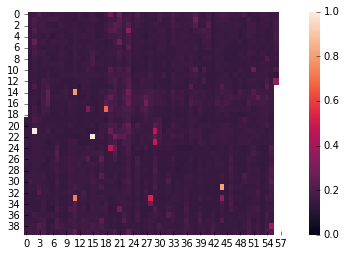

In [93]:
ax = sns.heatmap(m3.lane_qkv[1][1], vmin=0, vmax=1)

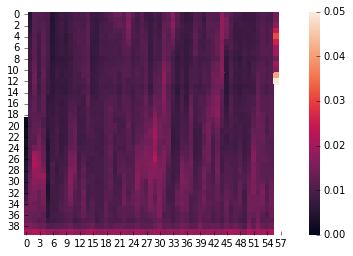

In [48]:
ax = sns.heatmap(m.lane_qkv[1][1], vmin=0, vmax=0.05)

In [49]:
ks = vk_sensing('SoftImpute')

In [37]:
ks.CVfit(m3.lane_qkv[1][1])

 5 0.0001368442682324344 1.0695191756305735
10 0.00014789367806343194 1.1118599186530336
15 0.00014934256266715265 1.1172929783799426


In [72]:
RMSN(m.lane_qkv[2][1], m3.lane_qkv[2][1])

0.5452005514897261

In [73]:
RMSPE(m.lane_qkv[2][1], m3.lane_qkv[2][1])

7.874641724501762

In [79]:
R2(m.lane_qkv[2][1], m3.lane_qkv[2][1])

-1.9085333782471086

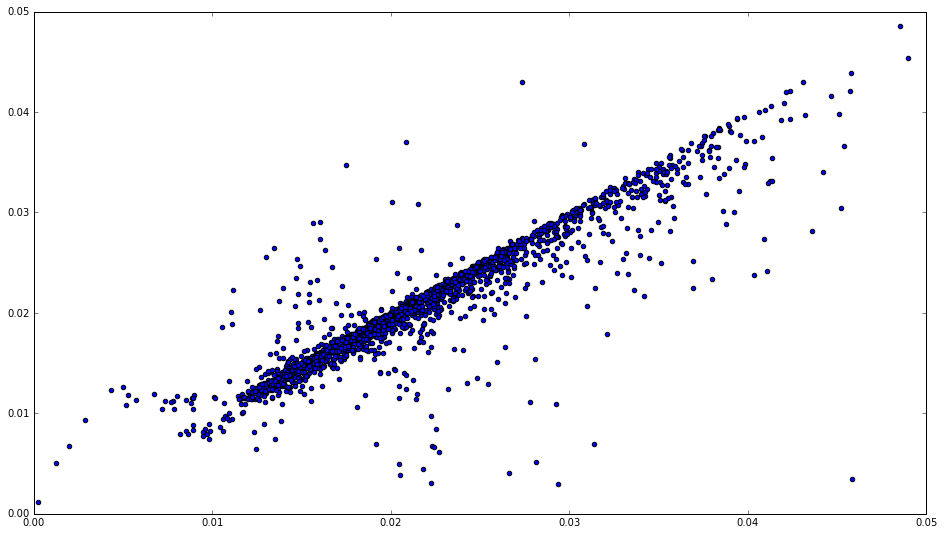

In [69]:
plt.figure(figsize = (16,9))
plt.scatter(m.lane_qkv[2][1].flatten(), m3.lane_qkv[2][1].flatten())
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])
plt.show()